<a href="https://colab.research.google.com/github/ss-Contreras/dropout-knn-svm/blob/main/DropoutUCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import json
import os
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_excel('DF_final_numerico.xlsx')

Fase 1: Análisis exploratorio de datos: EDA

In [ ]:
df.head()

ID_s  ID2  carrera  promedio_acad  edad  sisben  transporte  semestre  \
0     2    1        0            3.7    28      25           3         4   
1     2    2        1            3.7    20      27           5         8   
2     2    3        0            3.7    20      27           4         2   
3     2    4        0            3.7    20       0           0         5   
4     2    5        0            3.7    18       2           0         2   

   o_voca  e_carrera  ...  p_profesores  per_profesores  motivacion  \
0       5         17  ...             8              10          10   
1       5         17  ...             6              10           4   
2       5         17  ...             8               8          10   
3       5         17  ...             5              10          10   
4       5         17  ...             5               5           6   

   acoso_psc  c_acad  v_semestre  habilidades_pa  adaptacion_u  campus  \
0         10       4           8               9             9       9   
1         10       5          10              10             7      10   
2          2       2           8               8             8       8   
3         10      10           5               7            10      10   
4          8       4           8               6             7       8   

   recomendación_u  
0                9  
1               10  
2                9  
3                6  
4                6  

[5 rows x 44 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_s             483 non-null    int64  
 1   ID2              483 non-null    int64  
 2   carrera          483 non-null    int64  
 3   promedio_acad    483 non-null    float64
 4   edad             483 non-null    int64  
 5   sisben           483 non-null    int64  
 6   transporte       483 non-null    int64  
 7   semestre         483 non-null    int64  
 8   o_voca           483 non-null    int64  
 9   e_carrera        483 non-null    int64  
 10  i_carrera        483 non-null    int64  
 11  autopercepcion   483 non-null    int64  
 12  aban_inter       483 non-null    int64  
 13  razon            483 non-null    int64  
 14  c_universidad    483 non-null    int64  
 15  e_negativas      483 non-null    int64  
 16  g_afectacion     483 non-null    int64  
 17  r_carrera       

In [ ]:
df.isnull().sum()

ID_s               0
ID2                0
carrera            0
promedio_acad      0
edad               0
sisben             0
transporte         0
semestre           0
o_voca             0
e_carrera          0
i_carrera          0
autopercepcion     0
aban_inter         0
razon              0
c_universidad      0
e_negativas        0
g_afectacion       0
r_carrera          0
t_estudios         0
ingresos           0
m_residencia       0
p_cargo            0
financiacion       0
t_hijos            0
embarazo_des       0
dificultades_t     0
a_familiar         0
c_familiar         0
e_acad             0
d_acad             0
h_semanal          0
a_profesores       0
c_profesores       0
m_calificacion     0
p_profesores       0
per_profesores     0
motivacion         0
acoso_psc          0
c_acad             0
v_semestre         0
habilidades_pa     0
adaptacion_u       0
campus             0
recomendación_u    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df.columns:
    print(f"Columna {col} valor cuenta porcentaje :  ")
    print((df[col].value_counts())/len(df))
    print(f"Valor total cuenta Porcentaje en {col} : ")
    print((df[col].value_counts().sum())/len(df))

Columna ID_s valor cuenta porcentaje :  
ID_s
1    0.57971
2    0.42029
Name: count, dtype: float64
Valor total cuenta Porcentaje en ID_s : 
1.0
Columna ID2 valor cuenta porcentaje :  
ID2
1      0.00207
363    0.00207
331    0.00207
330    0.00207
329    0.00207
        ...   
157    0.00207
156    0.00207
155    0.00207
154    0.00207
483    0.00207
Name: count, Length: 483, dtype: float64
Valor total cuenta Porcentaje en ID2 : 
1.0
Columna carrera valor cuenta porcentaje :  
carrera
0    0.625259
1    0.374741
Name: count, dtype: float64
Valor total cuenta Porcentaje en carrera : 
1.0
Columna promedio_acad valor cuenta porcentaje :  
promedio_acad
4.0    0.229814
3.9    0.115942
4.1    0.101449
3.5    0.084886
3.8    0.080745
3.7    0.078675
3.0    0.064182
4.2    0.053830
3.6    0.049689
3.4    0.043478
4.4    0.033126
4.3    0.022774
3.2    0.010352
3.1    0.010352
3.3    0.006211
4.5    0.006211
4.6    0.006211
2.8    0.002070
Name: count, dtype: float64
Valor total cuenta Porcen

In [ ]:
df_filtered.describe().T

count        mean         std   min     25%    50%     75%  \
ID_s              88.0    1.522727    0.502346   1.0    1.00    2.0    2.00   
ID2               88.0  203.068182  124.893499   7.0  108.50  193.0  285.00   
carrera           88.0    0.511364    0.502735   0.0    0.00    1.0    1.00   
promedio_acad     88.0    3.884091    0.331103   3.0    3.70    4.0    4.10   
edad              88.0   20.284091    2.022567  18.0   19.00   20.0   21.00   
sisben            88.0   20.329545    9.913095   0.0   14.25   27.0   27.00   
transporte        88.0    2.681818    0.537030   1.0    2.00    3.0    3.00   
semestre          88.0    5.681818    2.710327   2.0    3.00    6.0    8.00   
o_voca            88.0    5.000000    0.000000   5.0    5.00    5.0    5.00   
e_carrera         88.0   17.000000    0.000000  17.0   17.00   17.0   17.00   
i_carrera         88.0    6.000000    0.000000   6.0    6.00    6.0    6.00   
autopercepcion    88.0    0.897727    1.295791   0.0    0.00    0.0    3.00   
aban_inter        88.0    0.000000    0.000000   0.0    0.00    0.0    0.00   
razon             88.0   21.000000    0.000000  21.0   21.00   21.0   21.00   
c_universidad     88.0    2.227273    0.783850   1.0    2.00    2.0    3.00   
e_negativas       88.0    2.613636    1.368209   0.0    2.00    2.0    4.00   
g_afectacion      88.0    4.534091    2.799626   1.0    2.00    5.5    7.00   
r_carrera         88.0   14.750000    3.773014   4.0   11.00   17.0   17.00   
t_estudios        88.0    3.511364    1.618814   0.0    2.00    4.0    5.00   
ingresos          88.0    3.034091    1.985284   0.0    1.00    3.0    5.00   
m_residencia      88.0   16.477273    3.223396   7.0   18.00   18.0   18.00   
p_cargo           88.0    2.000000    0.000000   2.0    2.00    2.0    2.00   
financiacion      88.0   12.886364    5.996995   0.0   11.00   15.0   15.00   
t_hijos           88.0    0.000000    0.000000   0.0    0.00    0.0    0.00   
embarazo_des      88.0    4.000000    0.000000   4.0    4.00    4.0    4.00   
dificultades_t    88.0    1.215909    0.964292   0.0    0.00    1.5    2.00   
a_familiar        88.0    1.545455    1.285723   0.0    1.00    1.0    2.25   
c_familiar        88.0    0.625000    0.900989   0.0    0.00    0.0    2.00   
e_acad            88.0    1.113636    0.889683   0.0    0.75    1.0    2.00   
d_acad            88.0    1.409091    0.705257   0.0    1.00    2.0    2.00   
h_semanal         88.0    3.590909    1.459305   0.0    3.00    3.0    5.00   
a_profesores      88.0    1.738636    1.442335   0.0    0.00    3.0    3.00   
c_profesores      88.0    1.386364    1.425803   0.0    0.00    1.0    3.00   
m_calificacion    88.0    6.136364    2.555957   1.0    5.00    7.0    8.00   
p_profesores      88.0    6.909091    1.459305   3.0    6.00    7.0    8.00   
per_profesores    88.0    7.534091    1.567991   2.0    7.00    8.0    8.25   
acoso_psc         88.0    7.284091    2.353520   1.0    6.00    8.0   10.00   
c_acad            88.0    5.784091    1.979486   1.0    5.00    6.0    7.00   
v_semestre        88.0    5.750000    2.275557   1.0    4.75    6.0    7.00   
habilidades_pa    88.0    6.886364    1.614815   3.0    6.00    7.0    8.00   
adaptacion_u      88.0    6.409091    2.566971   1.0    4.75    7.0    8.00   
campus            88.0    8.102273    1.462479   4.0    7.75    8.0    9.00   
recomendación_u   88.0    7.181818    1.938986   2.0    6.00    7.5    8.00   

                   max  
ID_s               2.0  
ID2              460.0  
carrera            1.0  
promedio_acad      4.6  
edad              26.0  
sisben            27.0  
transporte         4.0  
semestre          10.0  
o_voca             5.0  
e_carrera         17.0  
i_carrera          6.0  
autopercepcion     3.0  
aban_inter         0.0  
razon             21.0  
c_universidad      4.0  
e_negativas        7.0  
g_afectacion      10.0  
r_carrera         18.0  
t_estudios         5.0  
ingresos           5.0  
m_residencia   

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
numerical_data = df[num_cols]

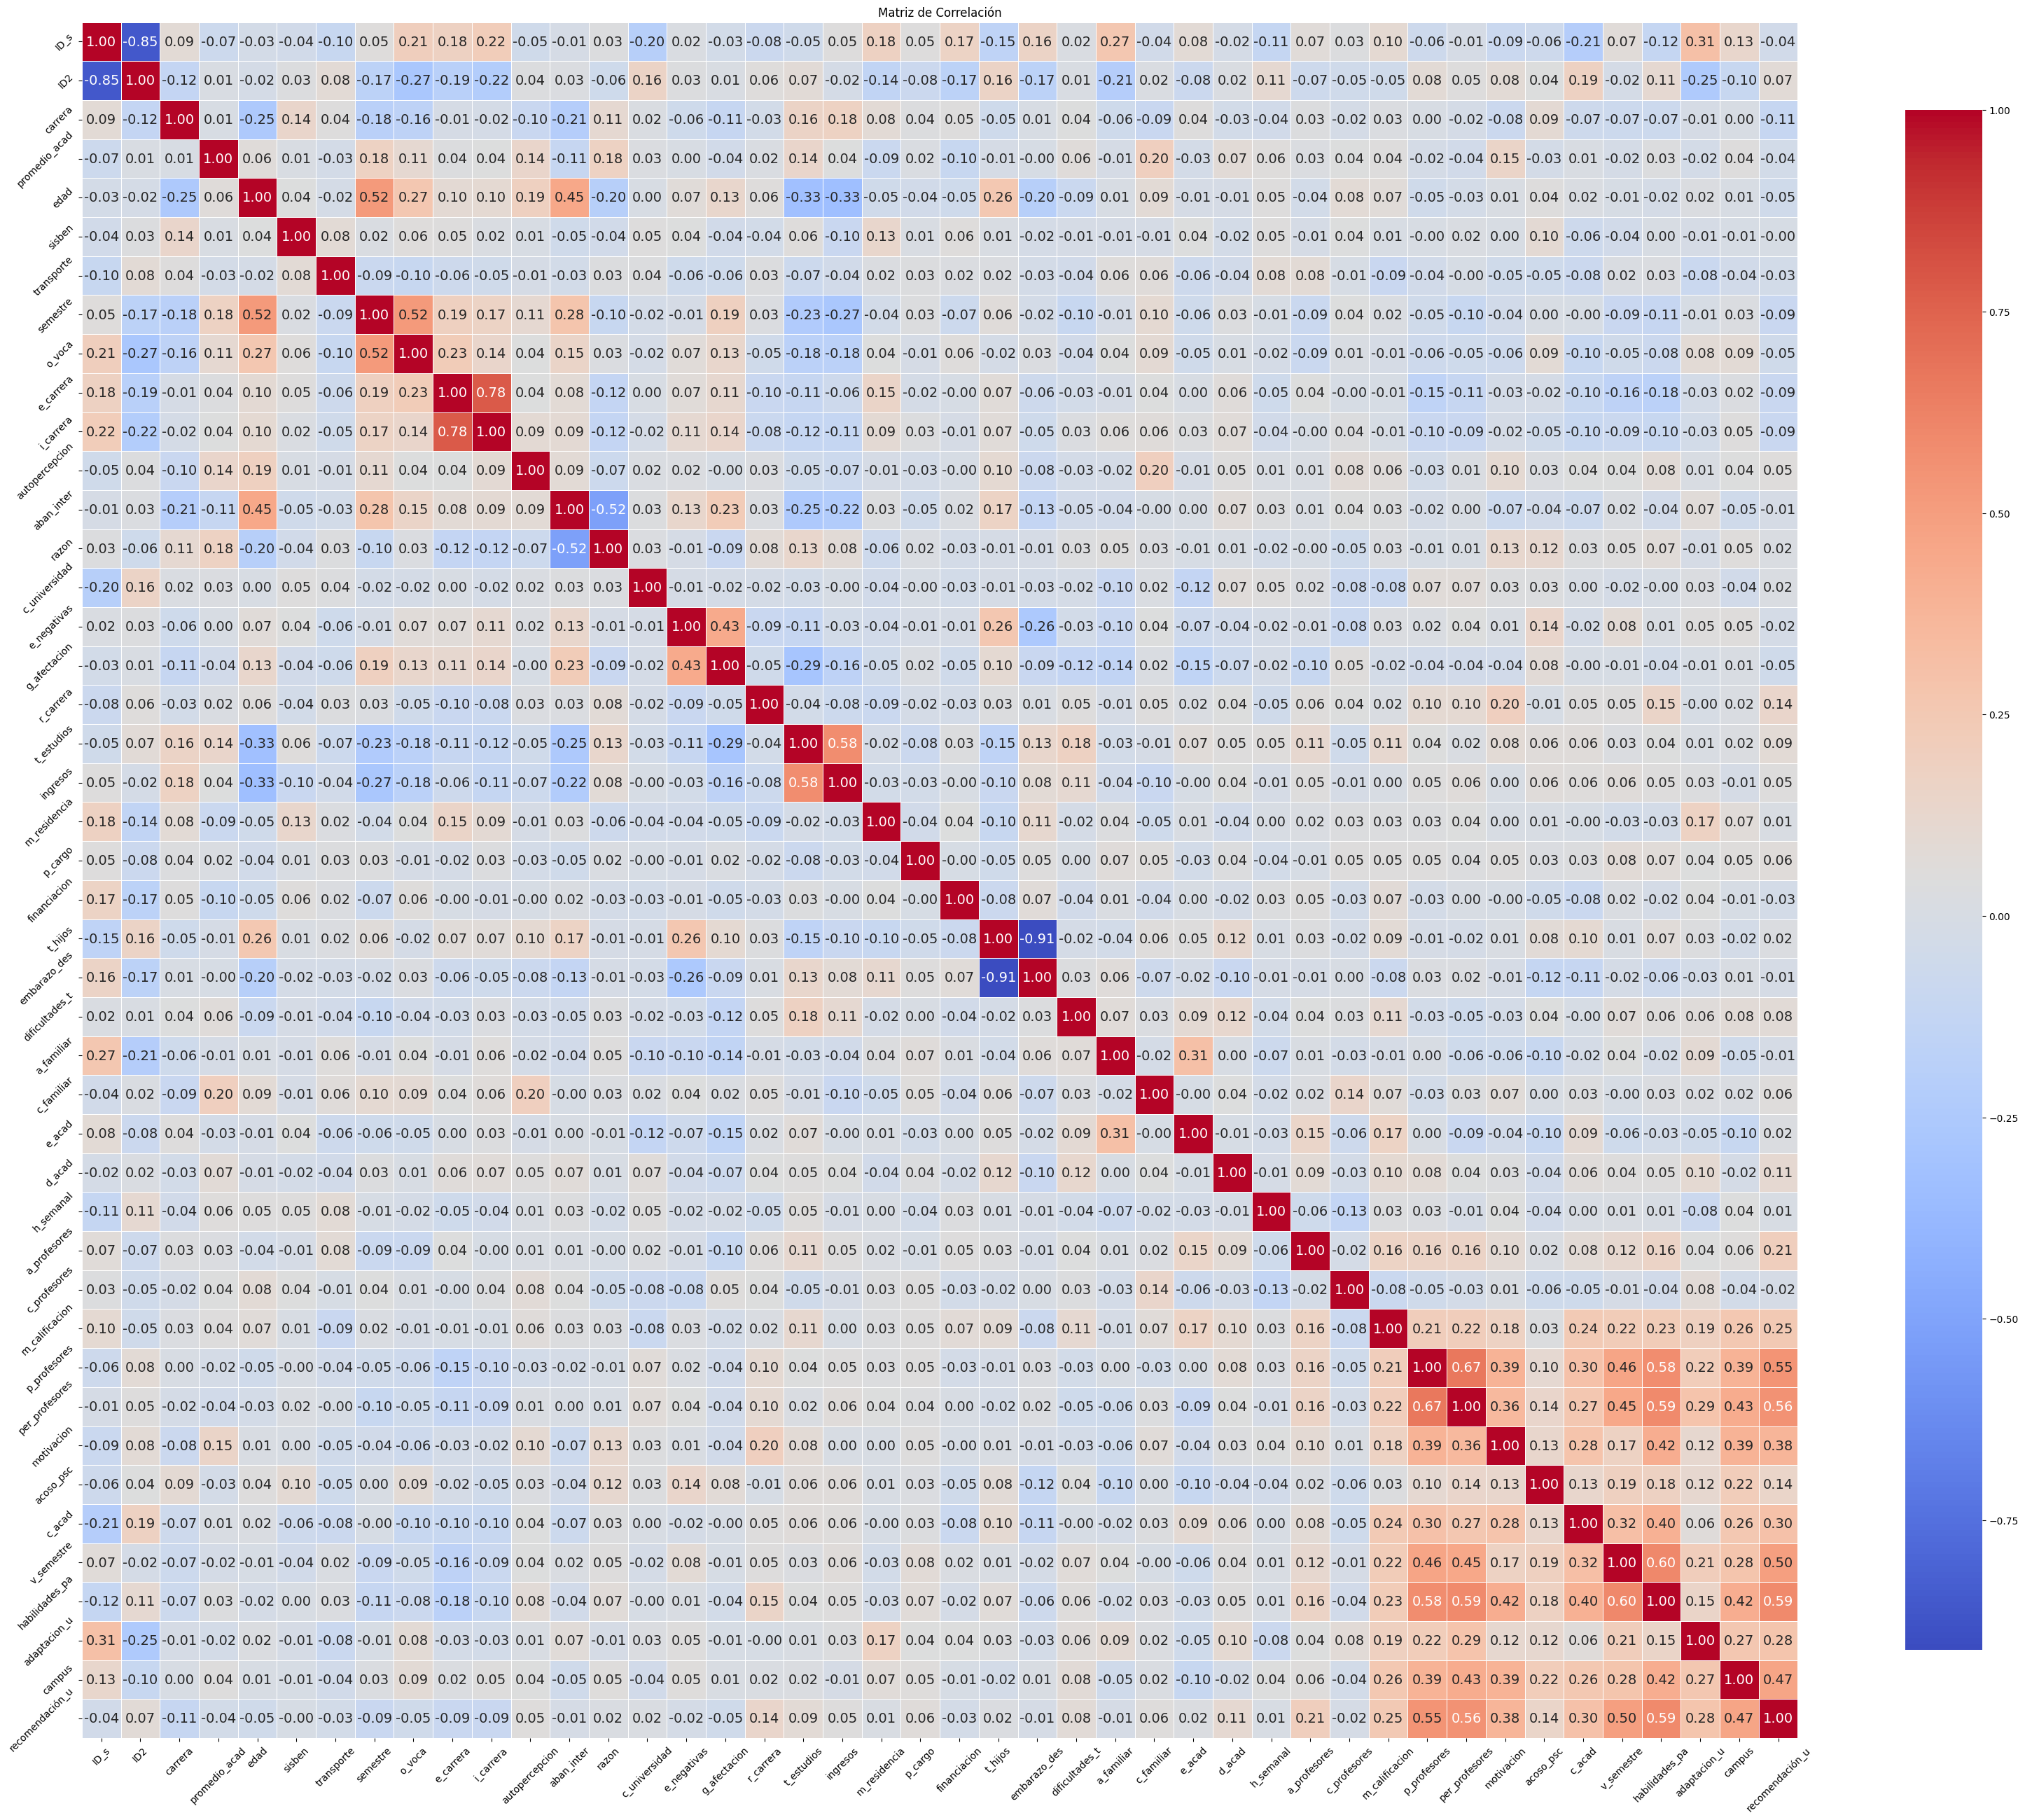

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la matriz de correlación
plt.figure(figsize=(32, 28))
sns.heatmap(numerical_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='white', annot_kws={"size": 14})
plt.title('Matriz de Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


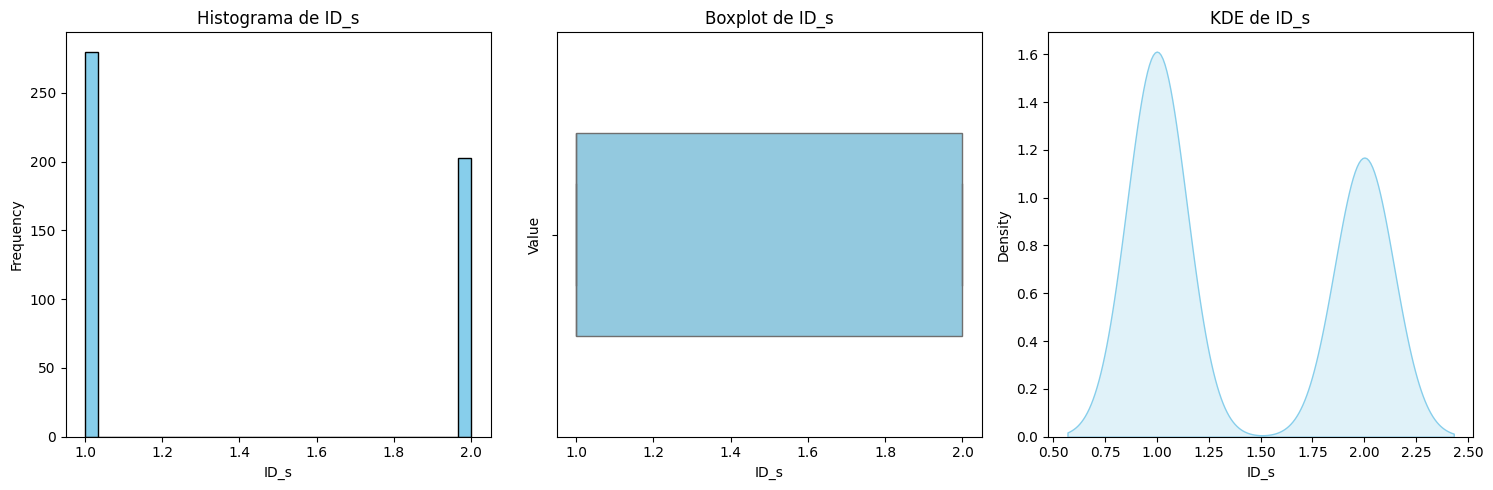

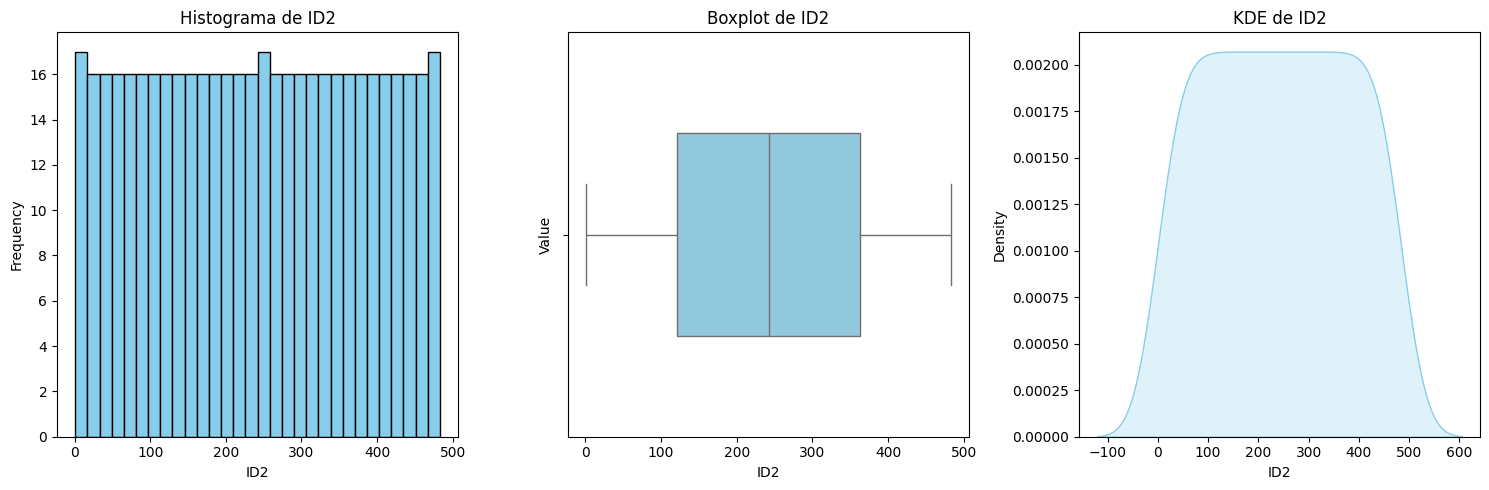

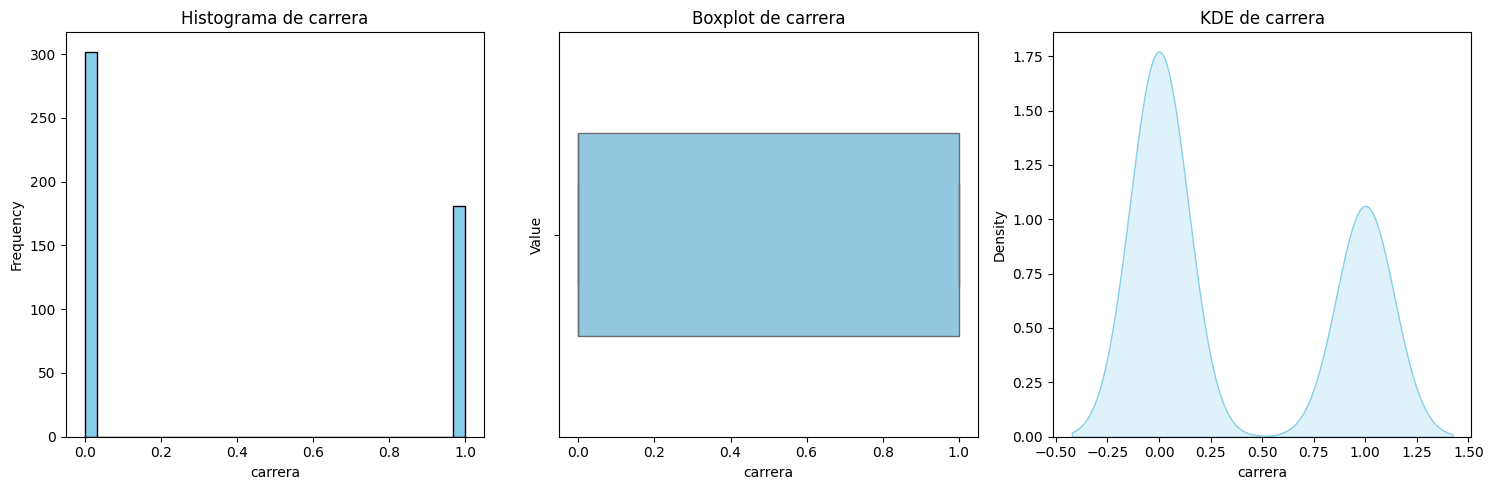

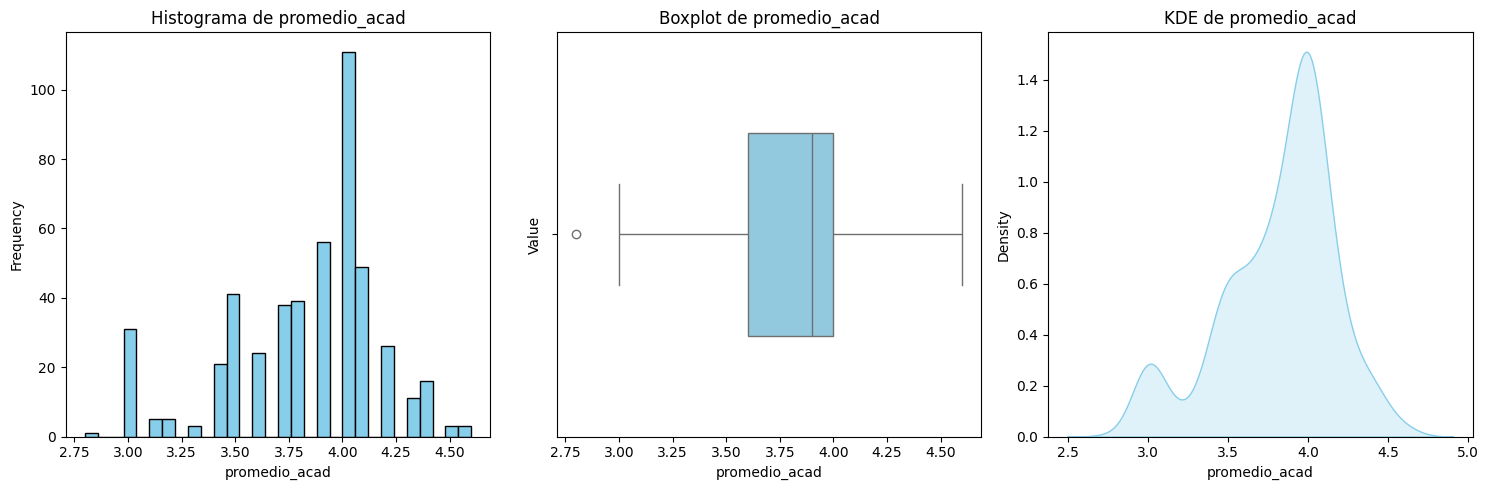

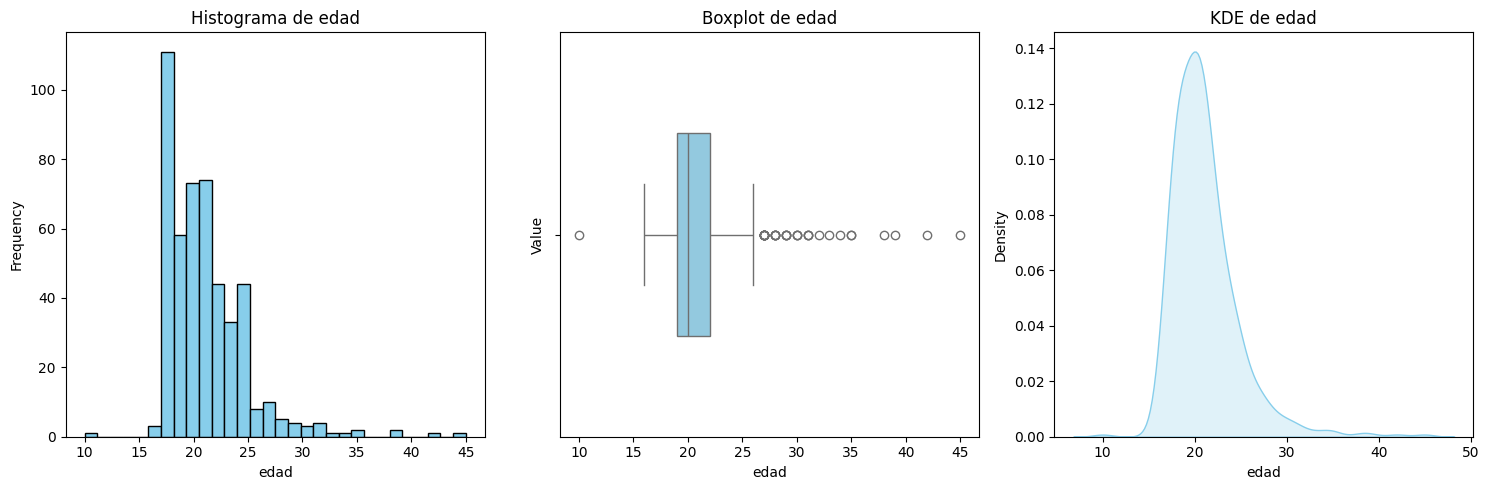

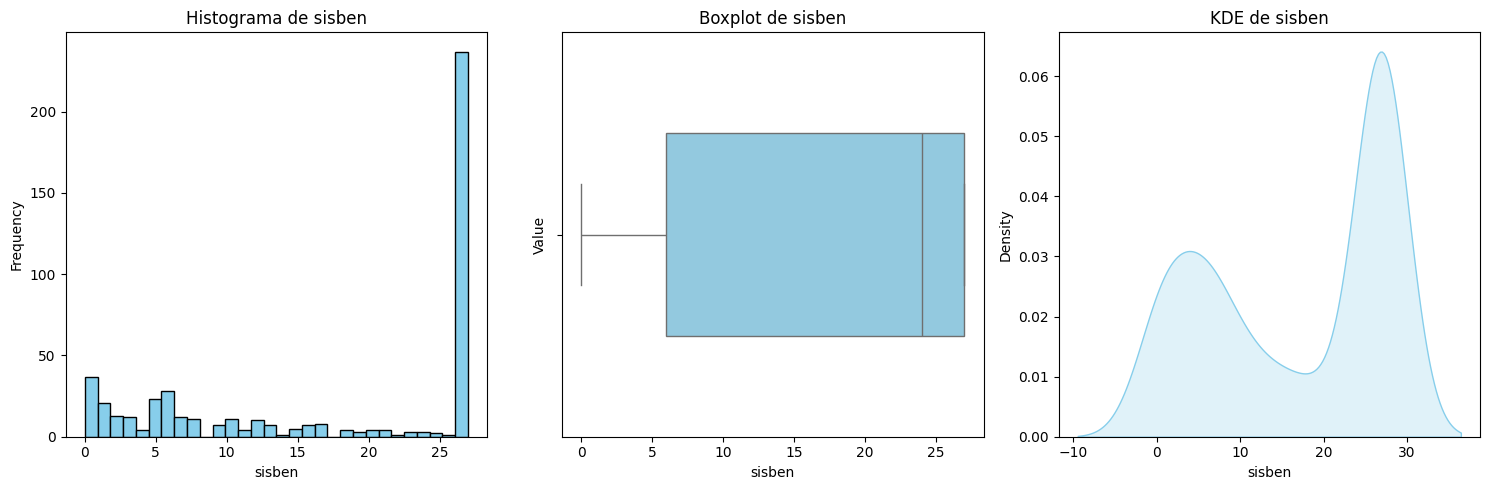

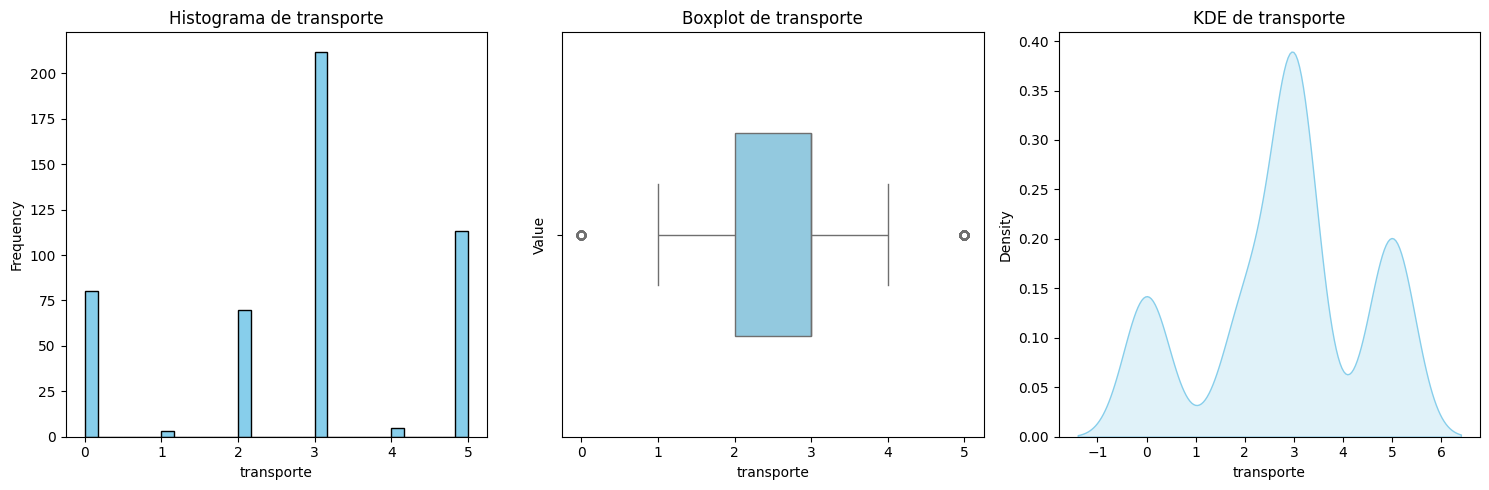

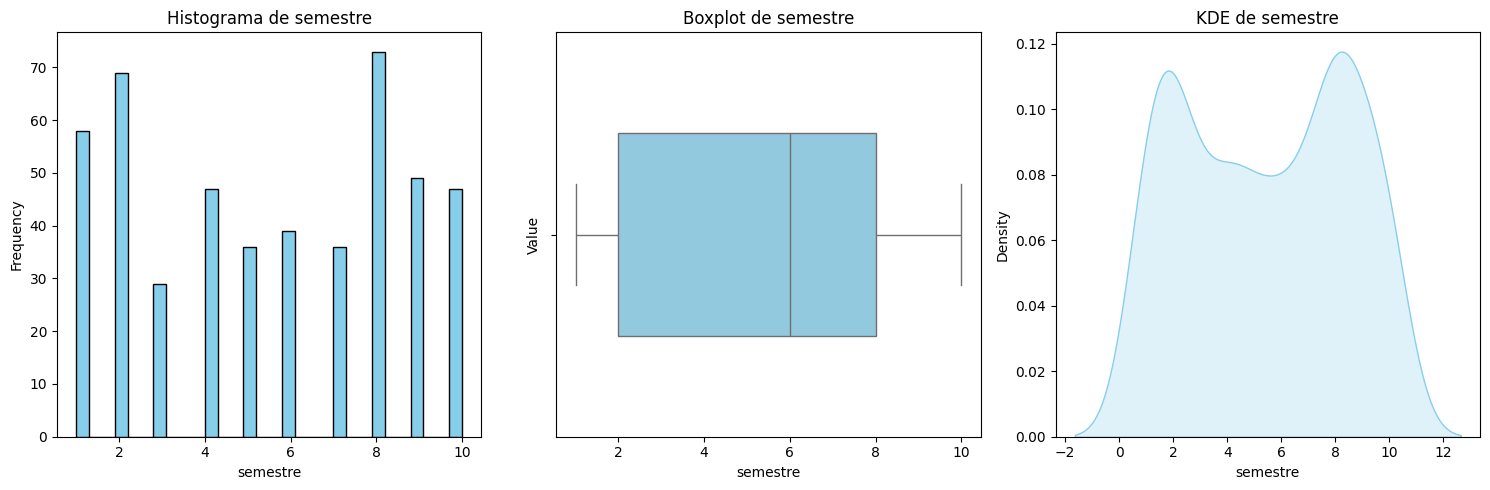

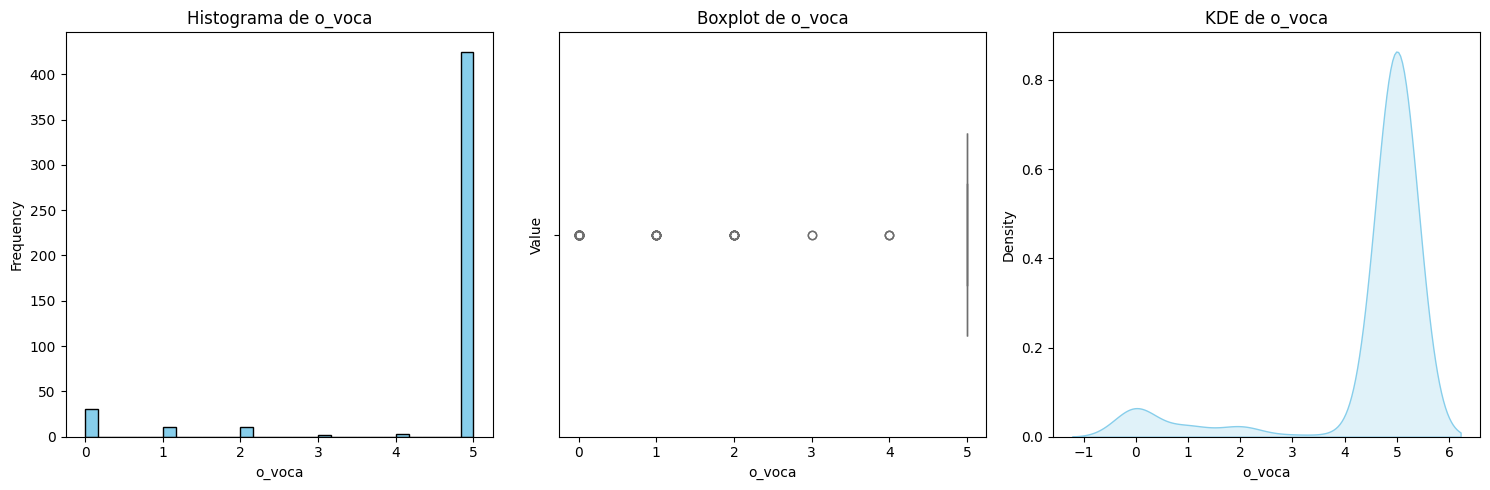

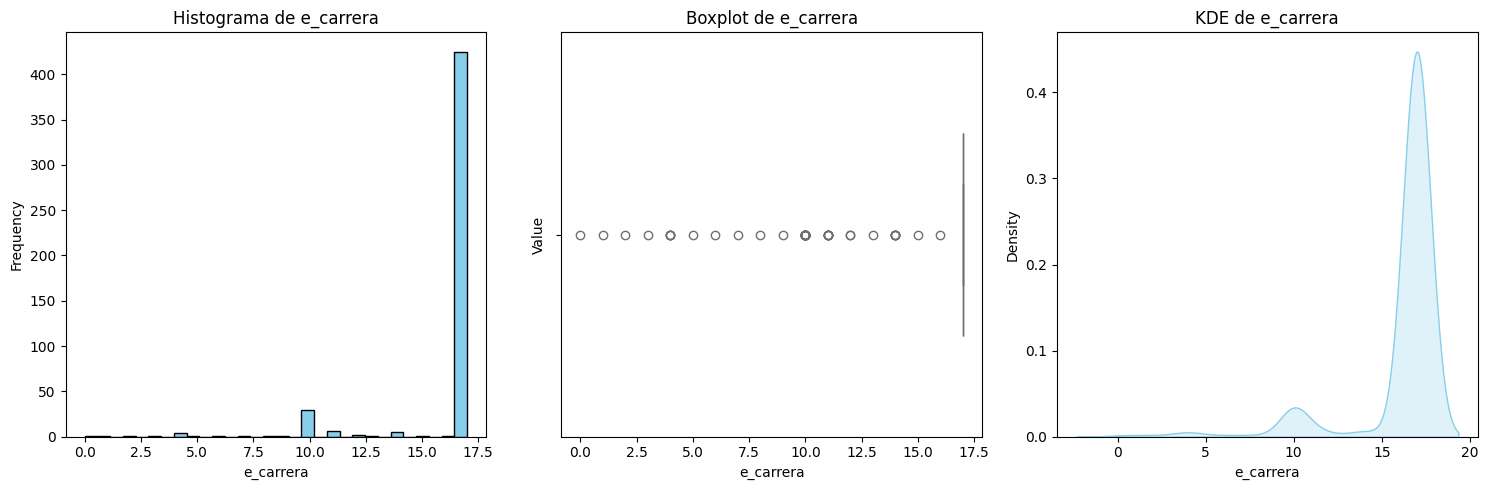

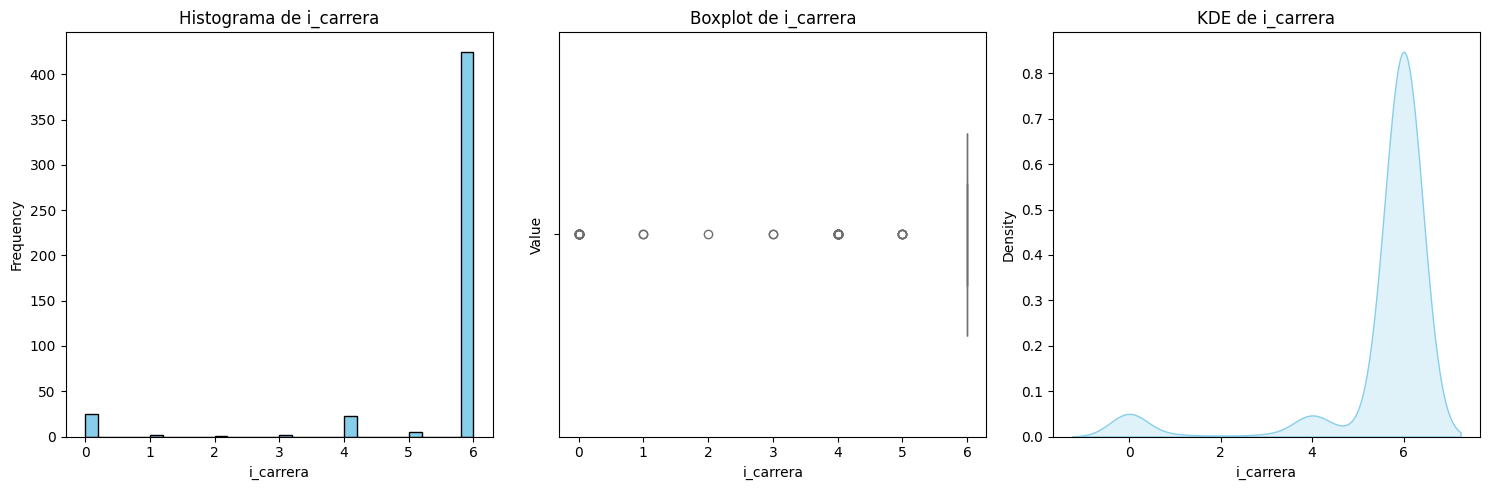

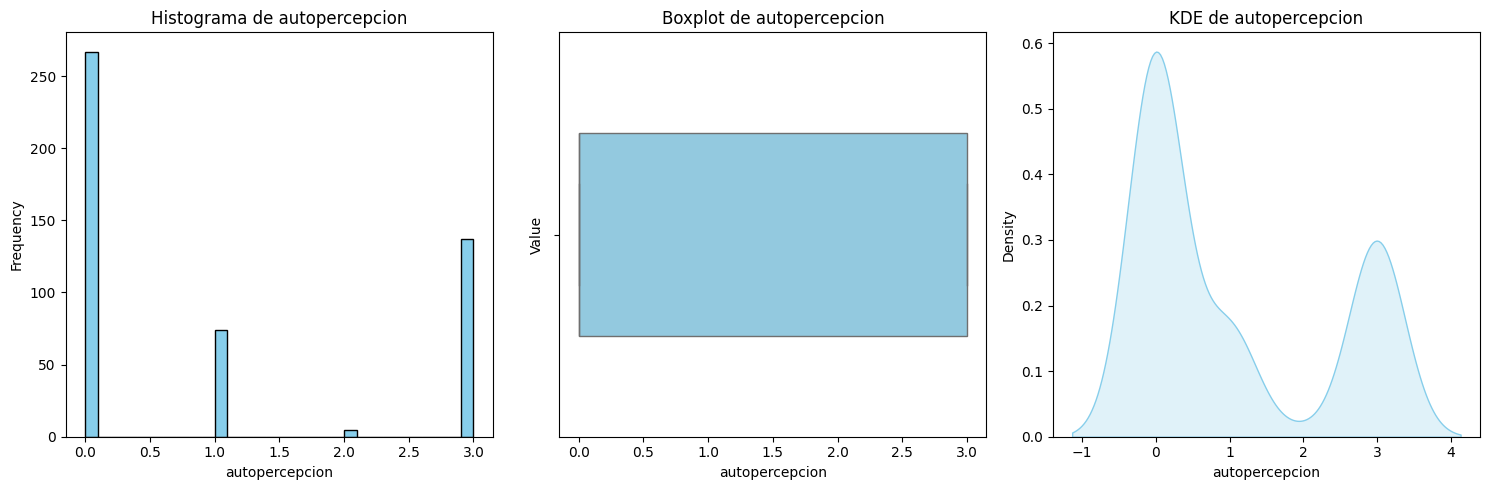

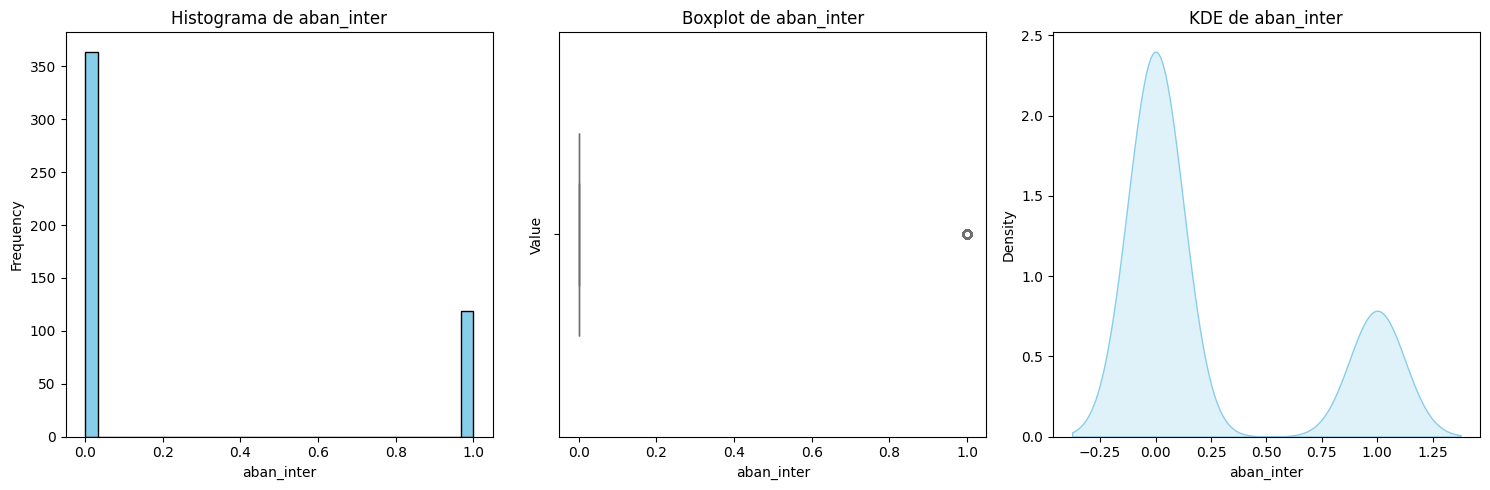

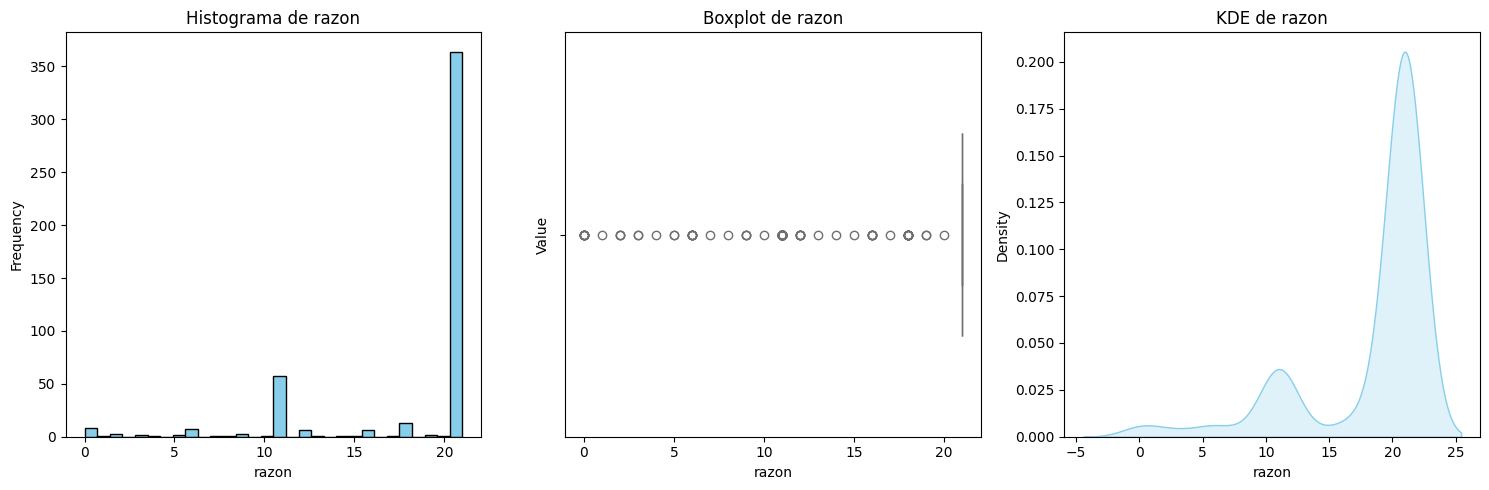

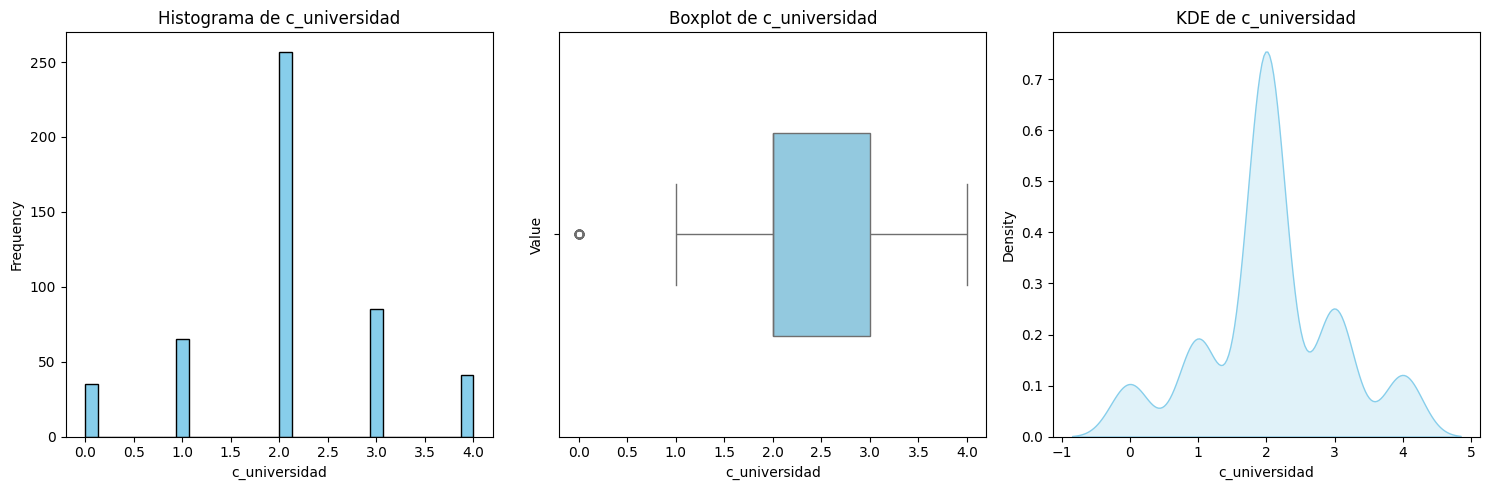

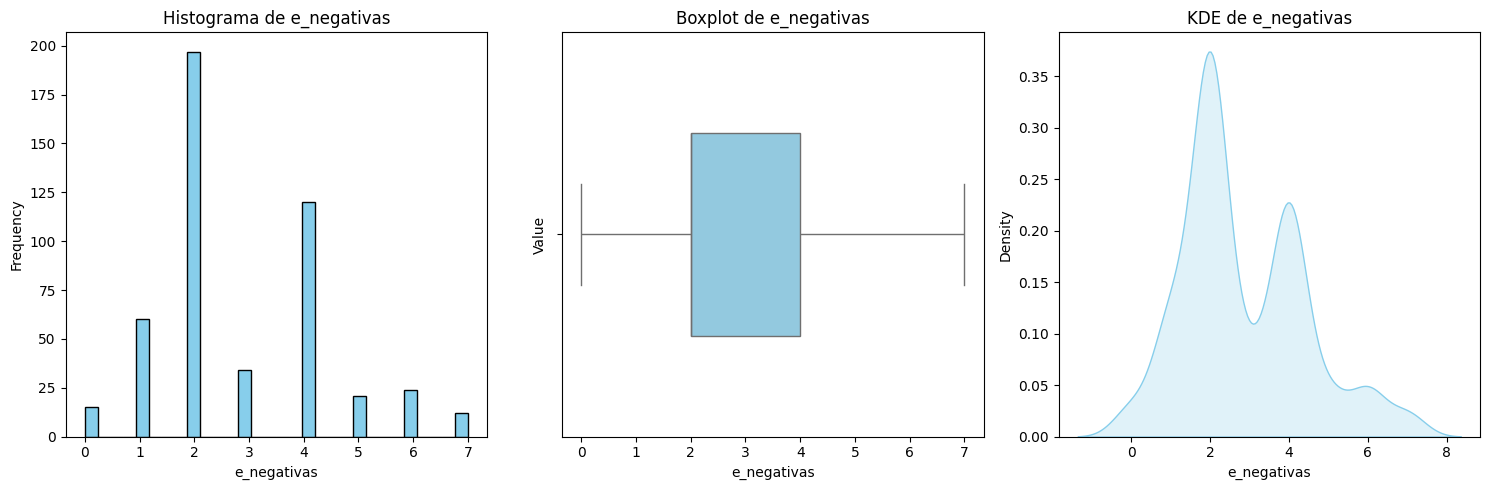

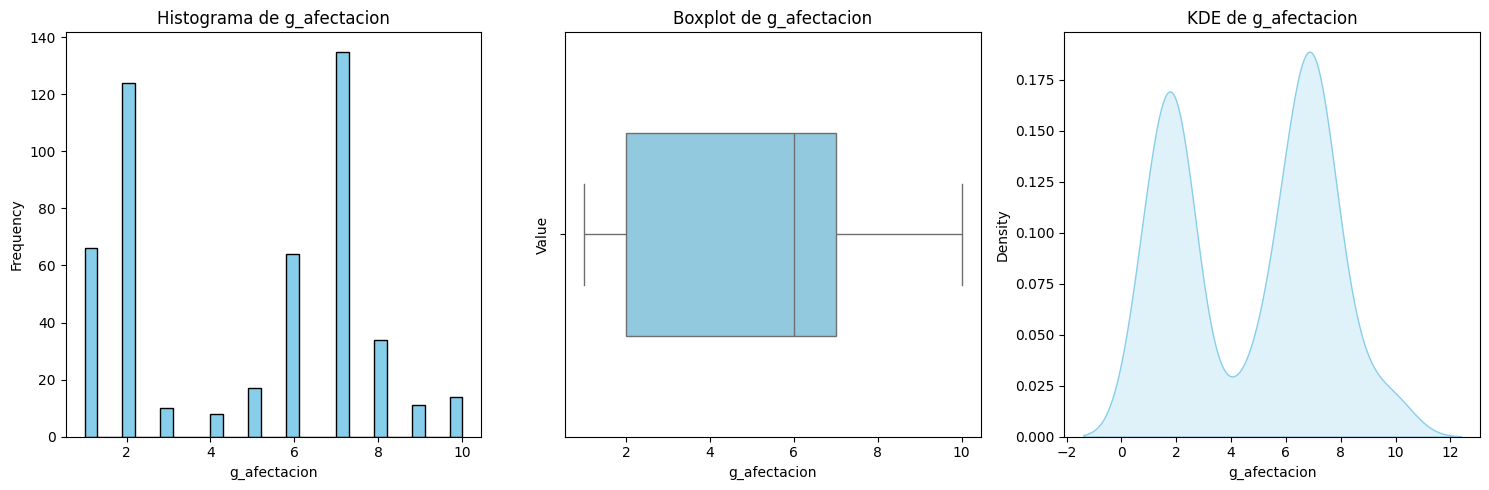

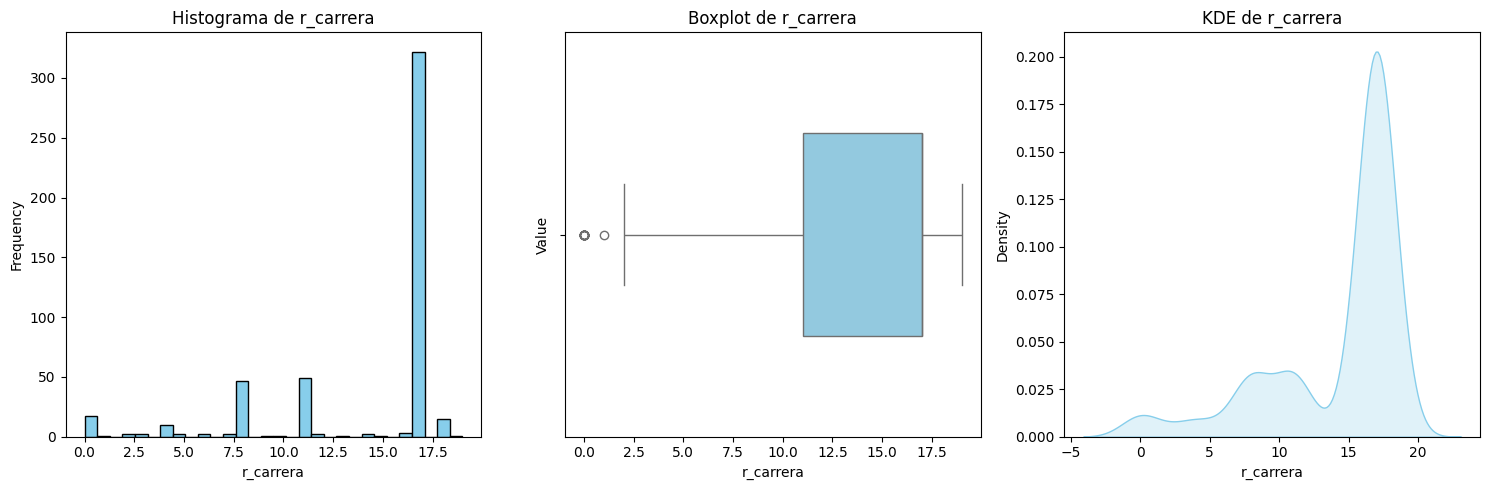

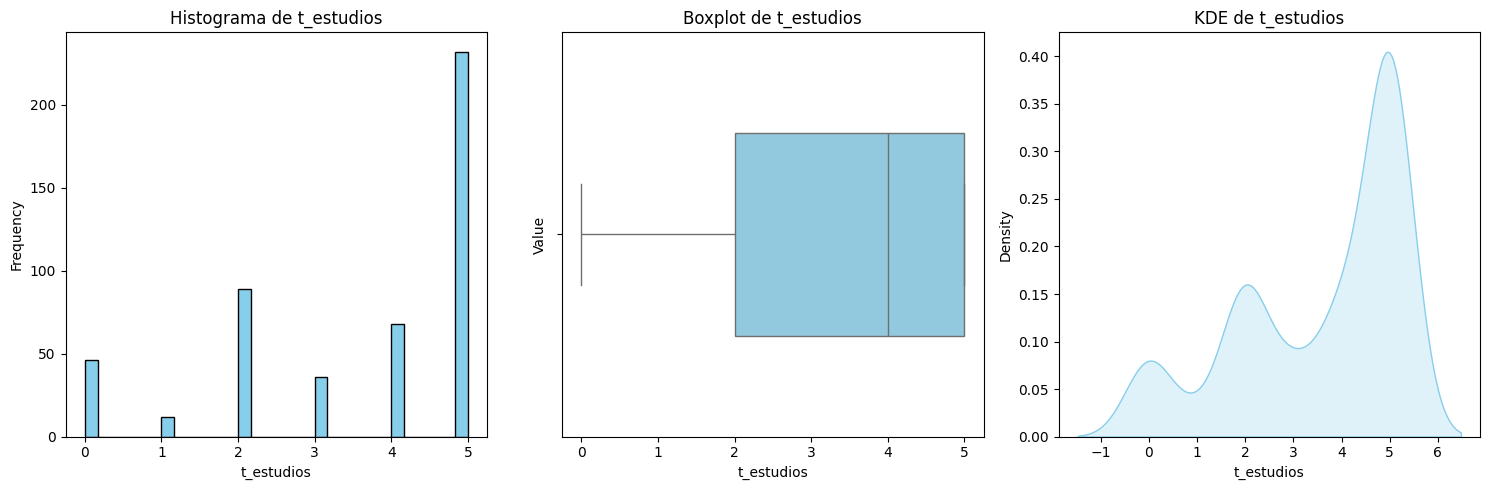

KeyboardInterrupt: 

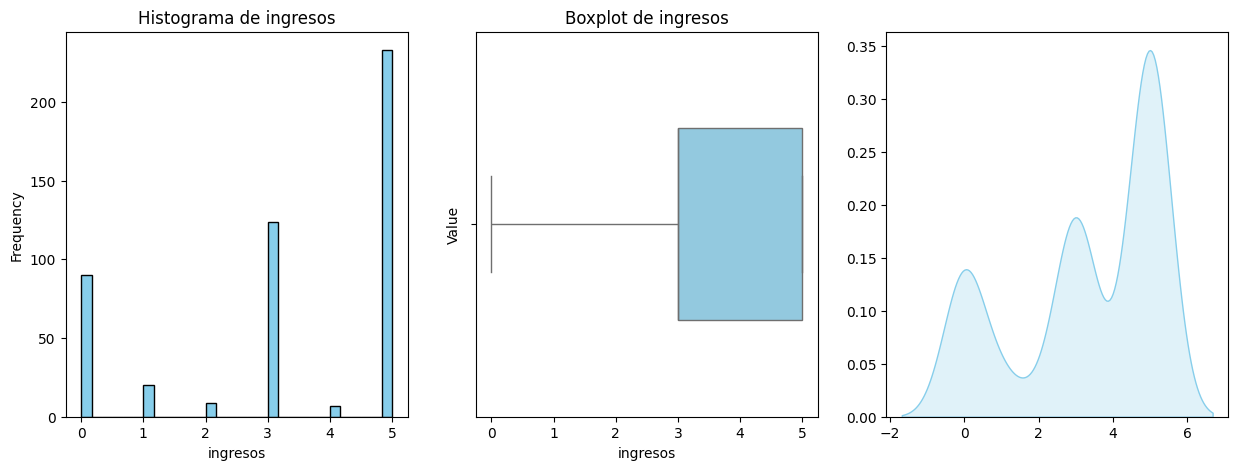

In [ ]:
for col in numerical_data[1:]:
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histograma de {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col],color='skyblue', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot de {col}')

    # KDE plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(df[col], color='skyblue', fill=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'KDE de {col}')

    plt.tight_layout()
    plt.show()

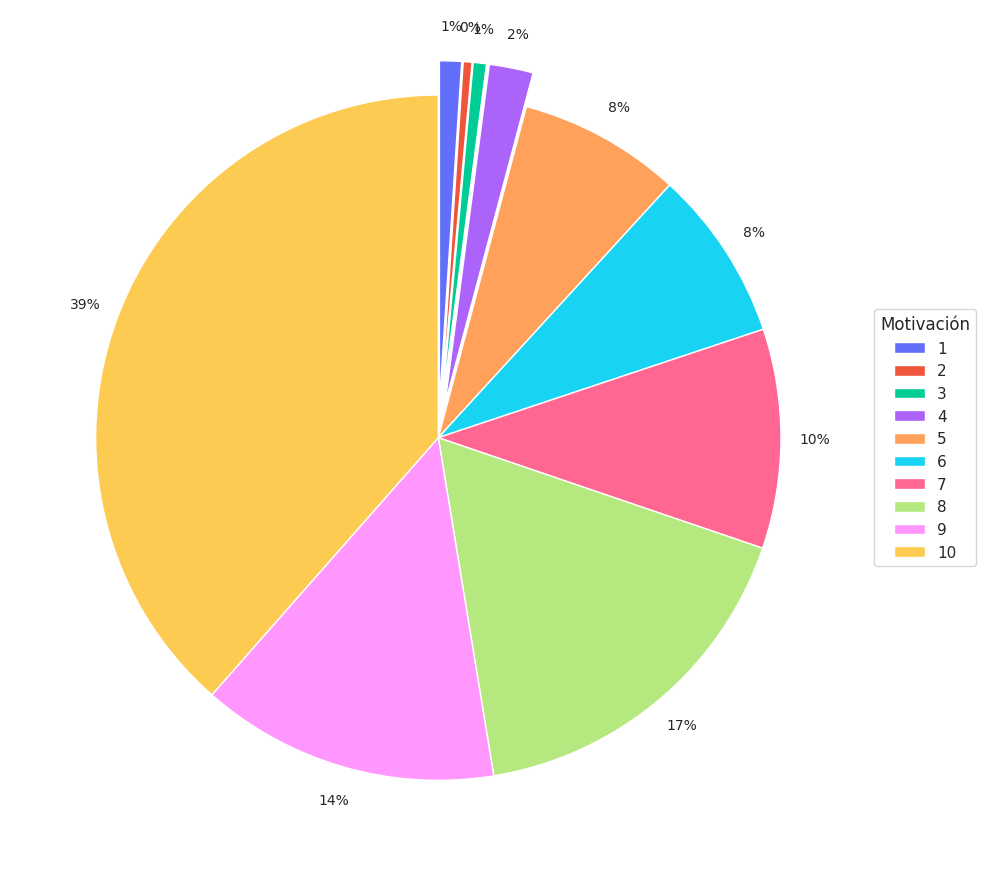

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

df['motivacion'] = df['motivacion'].astype(int)

motivacion_levels = range(1, 11)
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
          '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
color_map = dict(zip(motivacion_levels, colors))

motivacion_counts = df['motivacion'].value_counts().sort_index()
labels = motivacion_counts.index
values = motivacion_counts.values
slice_colors = [color_map[label] for label in labels]

total = sum(values)
threshold = 0.05  # 5%
explode = []

for value in values:
    if value / total < threshold:
        explode.append(0.1)
    else:
        explode.append(0)

explode = tuple(explode)

fig, ax = plt.subplots(figsize=(10, 10))

wedges, texts, autotexts = ax.pie(
    values,
    labels=None,
    colors=slice_colors,
    autopct='%1.0f%%',
    pctdistance=1.1,
    labeldistance=1.2,
    explode=explode,
    startangle=90,
    counterclock=False
)

for text in texts:
    text.set_text('')

for autotext in autotexts:
    autotext.set_fontsize(10)

legend_elements = [Patch(facecolor=color_map[level], label=str(level)) for level in labels]
ax.legend(handles=legend_elements, title='Motivación', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('')
plt.tight_layout()
plt.show()


Limpieza del conjunto de datos

In [ ]:
features_with_outliers = []
for feature in num_cols:
    percentile25 = df[feature].quantile(0.25)
    percentile75 = df[feature].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)]
    proportion_of_outliers = len(outliers) / len(df) * 100
    if len(outliers) > 0:
        features_with_outliers.append(feature)
        print(f"Feature: {feature}")
        print(f"Numero de outliers: {len(outliers)}")
        print(f"Proporción de outliers: {proportion_of_outliers:.2f}%\n")

Feature: promedio_acad
Numero de outliers: 1
Proporción de outliers: 0.21%

Feature: edad
Numero de outliers: 35
Proporción de outliers: 7.25%

Feature: transporte
Numero de outliers: 193
Proporción de outliers: 39.96%

Feature: o_voca
Numero de outliers: 58
Proporción de outliers: 12.01%

Feature: e_carrera
Numero de outliers: 58
Proporción de outliers: 12.01%

Feature: i_carrera
Numero de outliers: 58
Proporción de outliers: 12.01%

Feature: aban_inter
Numero de outliers: 119
Proporción de outliers: 24.64%

Feature: razon
Numero de outliers: 119
Proporción de outliers: 24.64%

Feature: c_universidad
Numero de outliers: 35
Proporción de outliers: 7.25%

Feature: r_carrera
Numero de outliers: 18
Proporción de outliers: 3.73%

Feature: m_residencia
Numero de outliers: 26
Proporción de outliers: 5.38%

Feature: p_cargo
Numero de outliers: 94
Proporción de outliers: 19.46%

Feature: t_hijos
Numero de outliers: 65
Proporción de outliers: 13.46%

Feature: embarazo_des
Numero de outliers: 65

In [ ]:
# Definimos un rango intercuartílico (IQR) más estricto para detectar y manejar los outliers en cada columna
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtramos los datos con un umbral más estricto para los outliers (1.5 * IQR)
df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verificación de las estadísticas descriptivas después de remover outliers
print("\nEstadísticas descriptivas después de eliminar outliers (umbral estricto):\n")
print(df_filtered.describe())


Estadísticas descriptivas después de eliminar outliers (umbral estricto):

            ID_s         ID2    carrera  promedio_acad       edad     sisben  \
count  88.000000   88.000000  88.000000      88.000000  88.000000  88.000000   
mean    1.522727  203.068182   0.511364       3.884091  20.284091  20.329545   
std     0.502346  124.893499   0.502735       0.331103   2.022567   9.913095   
min     1.000000    7.000000   0.000000       3.000000  18.000000   0.000000   
25%     1.000000  108.500000   0.000000       3.700000  19.000000  14.250000   
50%     2.000000  193.000000   1.000000       4.000000  20.000000  27.000000   
75%     2.000000  285.000000   1.000000       4.100000  21.000000  27.000000   
max     2.000000  460.000000   1.000000       4.600000  26.000000  27.000000   

       transporte   semestre  o_voca  e_carrera  ...  p_profesores  \
count   88.000000  88.000000    88.0       88.0  ...     88.000000   
mean     2.681818   5.681818     5.0       17.0  ...      6.909

In [ ]:
df_filtered.columns

Index(['ID_s', 'ID2', 'carrera', 'promedio_acad', 'edad', 'sisben',
       'transporte', 'semestre', 'o_voca', 'e_carrera', 'i_carrera',
       'autopercepcion', 'aban_inter', 'razon', 'c_universidad', 'e_negativas',
       'g_afectacion', 'r_carrera', 't_estudios', 'ingresos', 'm_residencia',
       'p_cargo', 'financiacion', 't_hijos', 'embarazo_des', 'dificultades_t',
       'a_familiar', 'c_familiar', 'e_acad', 'd_acad', 'h_semanal',
       'a_profesores', 'c_profesores', 'm_calificacion', 'p_profesores',
       'per_profesores', 'motivacion', 'acoso_psc', 'c_acad', 'v_semestre',
       'habilidades_pa', 'adaptacion_u', 'campus', 'recomendación_u',
       'motivacion_clasificada'],
      dtype='object')

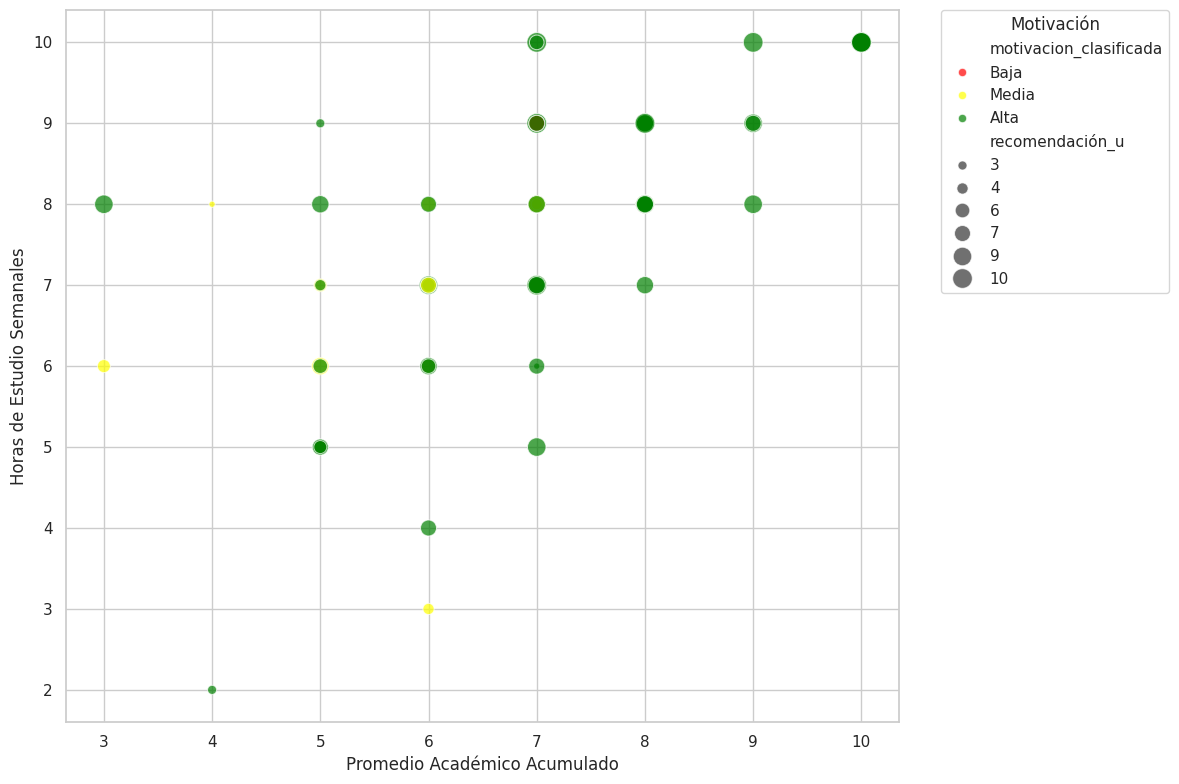

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered['motivacion'] = df_filtered['motivacion'].astype(int)

bins_motivacion = [0, 3, 7, 10]
labels_motivacion = ['Baja', 'Media', 'Alta']
df_filtered['motivacion_clasificada'] = pd.cut(
    df_filtered['motivacion'],
    bins=bins_motivacion,
    labels=labels_motivacion,
    include_lowest=True,
    right=True
)
motivacion_categories = ['Baja', 'Media', 'Alta']
df_filtered['motivacion_clasificada'] = pd.Categorical(
    df_filtered['motivacion_clasificada'],
    categories=motivacion_categories,
    ordered=True
)

df_filtered['p_profesores'] = pd.to_numeric(df_filtered['p_profesores'], errors='coerce')
df_filtered['per_profesores'] = pd.to_numeric(df_filtered['per_profesores'], errors='coerce')
df_filtered['recomendación_u'] = pd.to_numeric(df_filtered['recomendación_u'], errors='coerce')

x_var = 'p_profesores'
y_var = 'per_profesores'
size_var = 'recomendación_u'
color_var = 'motivacion_clasificada'

df_bubble = df_filtered[[x_var, y_var, size_var, color_var]]
df_bubble = df_bubble.dropna()

sns.set(style='whitegrid')

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_bubble,
    x=x_var,
    y=y_var,
    size=size_var,
    hue=color_var,
    sizes=(20, 200),
    alpha=0.7,
    palette={'Baja': 'red', 'Media': 'yellow', 'Alta': 'green'}
)

plt.xlabel('Promedio Académico Acumulado')
plt.ylabel('Horas de Estudio Semanales')

plt.legend(
    title='Motivación',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

bins_semestre = [0, 2, 4, 6, df_filtered['semestre'].max()]
labels_semestre = ['1-2', '3-4', '5-6', '7 o más']
df_filtered['grupo_semestre'] = pd.cut(
    df_filtered['semestre'],
    bins=bins_semestre,
    labels=labels_semestre,
    include_lowest=True,
    right=True
)
semestre_categories = ['1-2', '3-4', '5-6', '7 o más']
df_filtered['grupo_semestre'] = pd.Categorical(
    df_filtered['grupo_semestre'],
    categories=semestre_categories,
    ordered=True
)

df_filtered['motivacion'] = df_filtered['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df_filtered['motivacion'] = pd.Categorical(
    df_filtered['motivacion'],
    categories=motivacion_categories,
    ordered=True
)

fig = px.histogram(
    df_filtered,
    x='grupo_semestre',
    color='motivacion',
    category_orders={
        'grupo_semestre': semestre_categories,
        'motivacion': motivacion_categories
    },
    barmode='group',
    title='Distribución de Estudiantes por Grupo de Semestre y Motivación'
)

fig.update_layout(
    xaxis_title='Grupo de Semestre',
    yaxis_title='Frecuencia',
    legend_title='Motivación',
    title=dict(
        text='Distribución de Estudiantes por Grupo de Semestre y Motivación',
        font=dict(size=24)
    ),
    xaxis=dict(
        title=dict(font=dict(size=18)),
        tickfont=dict(size=16)
    ),
    yaxis=dict(
        title=dict(font=dict(size=18)),
        tickfont=dict(size=16)
    ),
    legend=dict(
        traceorder='normal',
        font=dict(
            size=20
        )
    )
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Convertir 'semestre' en categorías agrupadas
df_filtered['semestre'] = df_filtered['semestre'].astype(int)
bins_semestre = [0, 2, 4, 6, df_filtered['semestre'].max()]
labels_semestre = ['1-2', '3-4', '5-6', '7 o más']
df_filtered['grupo_semestre'] = pd.cut(
    df_filtered['semestre'],
    bins=bins_semestre,
    labels=labels_semestre,
    include_lowest=True,
    right=True
)
semestre_categories = ['1-2', '3-4', '5-6', '7 o más']
df_filtered['grupo_semestre'] = pd.Categorical(
    df_filtered['grupo_semestre'],
    categories=semestre_categories,
    ordered=True
)

# Convertir 'motivacion' en categoría ordenada
df_filtered['motivacion'] = df_filtered['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df_filtered['motivacion'] = pd.Categorical(
    df_filtered['motivacion'],
    categories=motivacion_categories,
    ordered=True
)

# Calcular las proporciones para cada combinación de grupo de semestre y motivación
df_percentage = df_filtered.groupby(['grupo_semestre', 'motivacion']).size().reset_index(name='count')
df_total = df_filtered.groupby(['grupo_semestre']).size().reset_index(name='total')
df_percentage = pd.merge(df_percentage, df_total, on='grupo_semestre')
df_percentage['percentage'] = (df_percentage['count'] / df_percentage['total']) * 100

# Crear el gráfico de barras apiladas con porcentajes
fig = px.bar(
    df_percentage,
    x='grupo_semestre',
    y='percentage',
    color='motivacion',
    category_orders={
        'grupo_semestre': semestre_categories,
        'motivacion': motivacion_categories
    },
    barmode='stack',
    title='Distribución de Estudiantes por Grupo de Semestre y Motivación (Porcentaje)'
)

fig.update_layout(
    xaxis_title='Grupo de Semestre',
    yaxis_title='Porcentaje',
    legend_title='Motivación',
    title=dict(
        text='Distribución de Estudiantes por Grupo de Semestre y Motivación (Porcentaje)',
        font=dict(size=24)
    ),
    xaxis=dict(
        title=dict(font=dict(size=18)),
        tickfont=dict(size=16)
    ),
    yaxis=dict(
        title=dict(font=dict(size=18)),
        tickfont=dict(size=16)
    ),
    legend=dict(
        traceorder='normal',
        font=dict(
            size=20
        )
    )
)

# Modificar los valores de frecuencia que son 0 para mostrarlos como "0%"
fig.update_traces(
    hovertemplate='%{x}<br>Porcentaje: %{y:.2f}%')

fig.show()


<ipython-input-10-a8f265df57f5>:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-10-a8f265df57f5>:33: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import pandas as pd
import plotly.express as px

# Convertir 'semestre' en categoría ordenada
df_filtered['semestre'] = df_filtered['semestre'].astype(int)
semestre_categories = list(range(1, df_filtered['semestre'].max() + 1))
df_filtered['semestre'] = pd.Categorical(
    df_filtered['semestre'],
    categories=semestre_categories,
    ordered=True
)

# Convertir 'motivacion' en categoría ordenada
df_filtered['motivacion'] = df_filtered['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df_filtered['motivacion'] = pd.Categorical(
    df_filtered['motivacion'],
    categories=motivacion_categories,
    ordered=True
)

# Calcular las proporciones para cada combinación de semestre y motivación
df_percentage = df_filtered.groupby(['semestre', 'motivacion']).size().reset_index(name='count')
df_total = df_filtered.groupby(['semestre']).size().reset_index(name='total')
df_percentage = pd.merge(df_percentage, df_total, on='semestre')
df_percentage['percentage'] = (df_percentage['count'] / df_percentage['total']) * 100

# Crear el gráfico de barras apiladas con porcentajes
fig = px.bar(
    df_percentage,
    x='semestre',
    y='percentage',
    color='motivacion',
    text='percentage',
    category_orders={
        'semestre': semestre_categories,
        'motivacion': motivacion_categories
    },
    barmode='stack',
    title='Distribución de Estudiantes por Semestre y Motivación (Porcentaje)'
)

# Actualizar el layout para mostrar los porcentajes dentro de las barras
fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='inside'
)

fig.update_layout(
    xaxis_title='Semestre',
    yaxis_title='Porcentaje',
    legend_title='Motivación',
    title=dict(
        text='Distribución de Estudiantes por Semestre y Motivación (Porcentaje)',
        font=dict(size=24)
    ),
    xaxis=dict(
        title=dict(font=dict(size=18)),
        tickfont=dict(size=16)
    ),
    yaxis=dict(
        title=dict(font=dict(size=18)),
        tickfont=dict(size=16)
    ),
    legend=dict(
        traceorder='normal',
        font=dict(
            size=20
        )
    )
)

fig.show()


<ipython-input-21-468acc7e97e8>:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-21-468acc7e97e8>:24: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import pandas as pd
import plotly.express as px

# Paso 1: Definir los bins y etiquetas para el grupo de edad
bins = [20, 24, df_filtered['edad'].max()]
labels = ['18-20', '21-24']
df_filtered['grupo_edad'] = pd.cut(df_filtered['edad'], bins=bins, labels=labels, right=True, include_lowest=True)
edad_categories = ['18-20', '21-24']
df_filtered['grupo_edad'] = pd.Categorical(df_filtered['grupo_edad'], categories=edad_categories, ordered=True)

# Paso 2: Convertir 'motivacion' en categoría ordenada
df_filtered['motivacion'] = df_filtered['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df_filtered['motivacion'] = pd.Categorical(df_filtered['motivacion'], categories=motivacion_categories, ordered=True)

# Paso 3: Crear el gráfico
fig = px.histogram(
    df_filtered,
    x='grupo_edad',
    color='motivacion',
    category_orders={
        'grupo_edad': edad_categories,
        'motivacion': motivacion_categories
    },
    barmode='group',
    title=''
)

# Ajustar el tamaño de la leyenda
fig.update_layout(
    xaxis_title='',
    yaxis_title='Frecuencia',
    legend_title='Motivación',
    legend=dict(
        traceorder='normal',
        font=dict(
            size=20  # Ajusta este valor para hacer la leyenda más grande
        )
    )
)

# Mostrar el gráfico
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px


bins = [15, 20, 25, 30, df['edad'].max()]
labels = ['16-20', '21-25', '26-30', 'Más de 30']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=True, include_lowest=True)
edad_categories = ['16-20', '21-25', '26-30', 'Más de 30']
df['grupo_edad'] = pd.Categorical(df['grupo_edad'], categories=edad_categories, ordered=True)

# Paso 2: Convertir 'motivacion' en categoría ordenada
df['motivacion'] = df['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df['motivacion'] = pd.Categorical(df['motivacion'], categories=motivacion_categories, ordered=True)

# Paso 3: Crear el gráfico
fig = px.histogram(
    df,
    x='grupo_edad',
    color='motivacion',
    category_orders={
        'grupo_edad': edad_categories,
        'motivacion': motivacion_categories
    },
    barmode='group',
    title='Distribución de Estudiantes por Grupo de Edad y Motivación'
)
fig.update_layout(
    xaxis_title='Grupo de Edad',
    yaxis_title='Frecuencia',
    legend_title='Motivación',
    legend=dict(traceorder='normal')
)
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Paso 1: Definir los bins y etiquetas para el grupo de edad
bins = [20, 24, df_filtered['edad'].max()]
labels = ['18-20', '21-24']
df_filtered['grupo_edad'] = pd.cut(df_filtered['edad'], bins=bins, labels=labels, right=True, include_lowest=True)
edad_categories = ['18-20', '21-24']
df_filtered['grupo_edad'] = pd.Categorical(df_filtered['grupo_edad'], categories=edad_categories, ordered=True)

# Paso 2: Convertir 'motivacion' en categoría ordenada
df_filtered['motivacion'] = df_filtered['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df_filtered['motivacion'] = pd.Categorical(df_filtered['motivacion'], categories=motivacion_categories, ordered=True)

# Paso 3: Crear el gráfico
fig = px.histogram(
    df_filtered,
    x='grupo_edad',
    color='motivacion',
    category_orders={
        'grupo_edad': edad_categories,
        'motivacion': motivacion_categories
    },
    barmode='group',
    title='Distribución de Estudiantes por Grupo de Edad y Motivación'
)

# Ajustar el tamaño de todos los elementos del gráfico
fig.update_layout(
    xaxis_title='Grupo de Edad',
    yaxis_title='Frecuencia',
    legend_title='Motivación',
    title=dict(
        text='Distribución de Estudiantes por Grupo de Edad y Motivación',
        font=dict(size=24)  # Aumentar el tamaño del título
    ),
    xaxis=dict(
        title=dict(font=dict(size=18)),  # Aumentar el tamaño del título del eje X
        tickfont=dict(size=16)  # Aumentar el tamaño de las etiquetas del eje X
    ),
    yaxis=dict(
        title=dict(font=dict(size=18)),  # Aumentar el tamaño del título del eje Y
        tickfont=dict(size=16)  # Aumentar el tamaño de las etiquetas del eje Y
    ),
    legend=dict(
        traceorder='normal',
        font=dict(
            size=20  # Ajustar este valor para hacer la leyenda más grande
        )
    )
)

# Mostrar el gráfico
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Convertir 'edad' en categoría ordenada
df_filtered['edad'] = df_filtered['edad'].astype(int)
edad_categories = sorted(df_filtered['edad'].unique())
df_filtered['edad'] = pd.Categorical(df_filtered['edad'], categories=edad_categories, ordered=True)

# Convertir 'motivacion' en categoría ordenada
df_filtered['motivacion'] = df_filtered['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df_filtered['motivacion'] = pd.Categorical(
    df_filtered['motivacion'],
    categories=motivacion_categories,
    ordered=True
)

fig = px.histogram(
    df_filtered,
    x='edad',
    color='motivacion',
    category_orders={
        'edad': edad_categories,
        'motivacion': motivacion_categories
    },
    barmode='group',
    title='Distribución de Estudiantes por Edad y Motivación'
)

fig.update_layout(
    xaxis_title='Edad',
    yaxis_title='Frecuencia',
    legend_title='Motivación',
    title=dict(
        text='Distribución de Estudiantes por Edad y Motivación',
        font=dict(size=24)
    ),
    xaxis=dict(
        title=dict(font=dict(size=18)),
        tickfont=dict(size=16)
    ),
    yaxis=dict(
        title=dict(font=dict(size=18)),
        tickfont=dict(size=16)
    ),
    legend=dict(
        traceorder='normal',
        font=dict(
            size=20
        )
    )
)

# Modificar los valores de frecuencia que son 0 para mostrarlos como "0%"
fig.update_traces(
    hovertemplate='%{x}<br>Frecuencia: %{y:.0f}%')

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Convertir 'edad' en categoría ordenada
df_filtered['edad'] = df_filtered['edad'].astype(int)
edad_categories = sorted(df_filtered['edad'].unique())
df_filtered['edad'] = pd.Categorical(df_filtered['edad'], categories=edad_categories, ordered=True)

# Convertir 'motivacion' en categoría ordenada
df_filtered['motivacion'] = df_filtered['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df_filtered['motivacion'] = pd.Categorical(
    df_filtered['motivacion'],
    categories=motivacion_categories,
    ordered=True
)

# Calcular las proporciones para cada combinación de edad y motivación
df_percentage = df_filtered.groupby(['edad', 'motivacion']).size().reset_index(name='count')
df_total = df_filtered.groupby(['edad']).size().reset_index(name='total')
df_percentage = pd.merge(df_percentage, df_total, on='edad')
df_percentage['percentage'] = (df_percentage['count'] / df_percentage['total']) * 100

# Crear el gráfico de barras apiladas con porcentajes
fig = px.bar(
    df_percentage,
    x='edad',
    y='percentage',
    color='motivacion',
    text='percentage',
    category_orders={
        'edad': edad_categories,
        'motivacion': motivacion_categories
    },
    barmode='stack',
    title='Distribución de Estudiantes por Edad y Motivación (Porcentaje)'
)

# Actualizar el layout para mostrar los porcentajes dentro de las barras
fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='inside'
)

fig.update_layout(
    xaxis_title='Edad',
    yaxis_title='Porcentaje',
    legend_title='Motivación',
    title=dict(
        text='Distribución de Estudiantes por Edad y Motivación (Porcentaje)',
        font=dict(size=24)
    ),
    xaxis=dict(
        title=dict(font=dict(size=18)),
        tickfont=dict(size=16)
    ),
    yaxis=dict(
        title=dict(font=dict(size=18)),
        tickfont=dict(size=16)
    ),
    legend=dict(
        traceorder='normal',
        font=dict(
            size=20
        )
    )
)

fig.show()


<ipython-input-22-98f4ea33c910>:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-22-98f4ea33c910>:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import pandas as pd
import plotly.express as px

# Paso 1: Definir los bins y etiquetas para el grupo de edad
bins = [20, 22,26, df_filtered['edad'].max()]
labels = ['18-20', '21-22', '23-26']
df_filtered['grupo_edad'] = pd.cut(df_filtered['edad'], bins=bins, labels=labels, right=True, include_lowest=True)
edad_categories = ['18-20', '21-24']
df_filtered['grupo_edad'] = pd.Categorical(df_filtered['grupo_edad'], categories=edad_categories, ordered=True)

# Paso 2: Convertir 'motivacion' en categoría ordenada
df_filtered['motivacion'] = df_filtered['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df_filtered['motivacion'] = pd.Categorical(df_filtered['motivacion'], categories=motivacion_categories, ordered=True)

# Paso 3: Crear el gráfico de grupo de edad
fig = px.histogram(
    df_filtered,
    x='grupo_edad',
    color='motivacion',
    category_orders={
        'grupo_edad': edad_categories,
        'motivacion': motivacion_categories
    },
    barmode='group',
    title='Distribución de Estudiantes por Grupo de Edad y Motivación'
)

# Ajustar el tamaño de todos los elementos del gráfico
fig.update_layout(
    xaxis_title='Grupo de Edad',
    yaxis_title='Frecuencia',
    legend_title='Motivación',
    title=dict(
        text='Distribución de Estudiantes por Grupo de Edad y Motivación',
        font=dict(size=24)  # Aumentar el tamaño del título
    ),
    xaxis=dict(
        title=dict(font=dict(size=18)),  # Aumentar el tamaño del título del eje X
        tickfont=dict(size=16)  # Aumentar el tamaño de las etiquetas del eje X
    ),
    yaxis=dict(
        title=dict(font=dict(size=18)),  # Aumentar el tamaño del título del eje Y
        tickfont=dict(size=16)  # Aumentar el tamaño de las etiquetas del eje Y
    ),
    legend=dict(
        traceorder='normal',
        font=dict(
            size=20  # Ajustar este valor para hacer la leyenda más grande
        )
    )
)

# Mostrar el gráfico
fig.show()

# Paso 4: Definir los bins y etiquetas para el grupo de semestre
bins_semestre = [0, 2, 4, 6, df['semestre'].max()]
labels_semestre = ['1-2', '3-4', '5-6', '7 o más']
df['grupo_semestre'] = pd.cut(
    df['semestre'],
    bins=bins_semestre,
    labels=labels_semestre,
    include_lowest=True,
    right=True
)
semestre_categories = ['1-2', '3-4', '5-6', '7 o más']
df['grupo_semestre'] = pd.Categorical(
    df['grupo_semestre'],
    categories=semestre_categories,
    ordered=True
)

# Paso 5: Convertir 'motivacion' en categoría ordenada para grupo de semestre
df['motivacion'] = df['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df['motivacion'] = pd.Categorical(
    df['motivacion'],
    categories=motivacion_categories,
    ordered=True
)

# Paso 6: Crear el gráfico de grupo de semestre
fig = px.histogram(
    df,
    x='grupo_semestre',
    color='motivacion',
    category_orders={
        'grupo_semestre': semestre_categories,
        'motivacion': motivacion_categories
    },
    barmode='group',
    title='Distribución de Estudiantes por Grupo de Semestre y Motivación'
)

# Ajustar el tamaño de todos los elementos del gráfico de grupo de semestre
fig.update_layout(
    xaxis_title='Grupo de Semestre',
    yaxis_title='Frecuencia',
    legend_title='Motivación',
    title=dict(
        text='',
        font=dict(size=24)  # Aumentar el tamaño del título
    ),
    xaxis=dict(
        title=dict(font=dict(size=18)),  # Aumentar el tamaño del título del eje X
        tickfont=dict(size=16)  # Aumentar el tamaño de las etiquetas del eje X
    ),
    yaxis=dict(
        title=dict(font=dict(size=18)),  # Aumentar el tamaño del título del eje Y
        tickfont=dict(size=16)  # Aumentar el tamaño de las etiquetas del eje Y
    ),
    legend=dict(
        traceorder='normal',
        font=dict(
            size=20  # Ajustar este valor para hacer la leyenda más grande
        )
    )
)

# Mostrar el gráfico de grupo de semestre
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Paso 4: Definir los bins y etiquetas para el grupo de semestre
bins_semestre = [0, 2, 4, 6, df_filtered['semestre'].max()]
labels_semestre = ['1-2', '3-4', '5-6', '7 o más']
df_filtered['grupo_semestre'] = pd.cut(
    df_filtered['semestre'],
    bins=bins_semestre,
    labels=labels_semestre,
    include_lowest=True,
    right=True
)
semestre_categories = ['1-2', '3-4', '5-6', '7 o más']
df_filtered['grupo_semestre'] = pd.Categorical(
    df_filtered['grupo_semestre'],
    categories=semestre_categories,
    ordered=True
)

# Paso 5: Convertir 'motivacion' en categoría ordenada para grupo de semestre
df_filtered['motivacion'] = df_filtered['motivacion'].astype(int)
motivacion_categories = list(range(1, 11))
df_filtered['motivacion'] = pd.Categorical(
    df_filtered['motivacion'],
    categories=motivacion_categories,
    ordered=True
)

# Paso 6: Crear el gráfico de grupo de semestre
fig = px.histogram(
    df_filtered,
    x='grupo_semestre',
    color='motivacion',
    category_orders={
        'grupo_semestre': semestre_categories,
        'motivacion': motivacion_categories
    },
    barmode='group',
    title='Distribución de Estudiantes por Grupo de Semestre y Motivación'
)

# Ajustar el tamaño de todos los elementos del gráfico de grupo de semestre
fig.update_layout(
    xaxis_title='Grupo de Semestre',
    yaxis_title='Frecuencia',
    legend_title='Motivación',
    title=dict(
        text='',
        font=dict(size=24)  # Aumentar el tamaño del título
    ),
    xaxis=dict(
        title=dict(font=dict(size=18)),  # Aumentar el tamaño del título del eje X
        tickfont=dict(size=16)  # Aumentar el tamaño de las etiquetas del eje X
    ),
    yaxis=dict(
        title=dict(font=dict(size=18)),  # Aumentar el tamaño del título del eje Y
        tickfont=dict(size=16)  # Aumentar el tamaño de las etiquetas del eje Y
    ),
    legend=dict(
        traceorder='normal',
        font=dict(
            size=20  # Ajustar este valor para hacer la leyenda más grande
        )
    )
)

# Mostrar el gráfico de grupo de semestre
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

bins_edad = [15, 20, 25, 30, df['edad'].max()]
labels_edad = ['16-20', '21-25', '26-30', 'Más de 30']

df['grupo_edad'] = pd.cut(
    df['edad'],
    bins=bins_edad,
    labels=labels_edad,
    right=True,
    include_lowest=True
)

bins_promedio = [0, 2.5, 3.0, 3.5, 4.0, 5.0]
labels_promedio = ['0.0-2.5', '2.6-3.0', '3.1-3.5', '3.6-4.0', '4.1-5.0']

df['grupo_promedio'] = pd.cut(
    df['promedio_acad'],
    bins=bins_promedio,
    labels=labels_promedio,
    include_lowest=True,
    right=True
)

edad_categories = ['16-20', '21-25', '26-30', 'Más de 30']
df['grupo_edad'] = pd.Categorical(
    df['grupo_edad'],
    categories=edad_categories,
    ordered=True
)

promedio_categories = ['0.0-2.5', '2.6-3.0', '3.1-3.5', '3.6-4.0', '4.1-5.0']
df['grupo_promedio'] = pd.Categorical(
    df['grupo_promedio'],
    categories=promedio_categories,
    ordered=True
)

carrera_categories = sorted(df['carrera'].unique())
df['carrera'] = pd.Categorical(
    df['carrera'],
    categories=carrera_categories,
    ordered=True
)

fig = px.histogram(
    df,
    x='grupo_promedio',
    color='carrera',
    barmode='stack',
    category_orders={
        'grupo_promedio': promedio_categories,
        'carrera': carrera_categories
    },
    title=''
)

fig.update_layout(
    xaxis_title='',
    yaxis_title='Frecuencia',
    legend_title='Carrera'
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

df['motivacion'] = df['motivacion'].astype(int)

bins_motivacion = [0, 3, 7, 10]
labels_motivacion = ['Baja', 'Media', 'Alta']

df['motivacion_clasificada'] = pd.cut(
    df['motivacion'],
    bins=bins_motivacion,
    labels=labels_motivacion,
    include_lowest=True,
    right=True
)

motivacion_categories = ['Baja', 'Media', 'Alta']

df['motivacion_clasificada'] = pd.Categorical(
    df['motivacion_clasificada'],
    categories=motivacion_categories,
    ordered=True
)


<ipython-input-44-34b3ab81768d>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




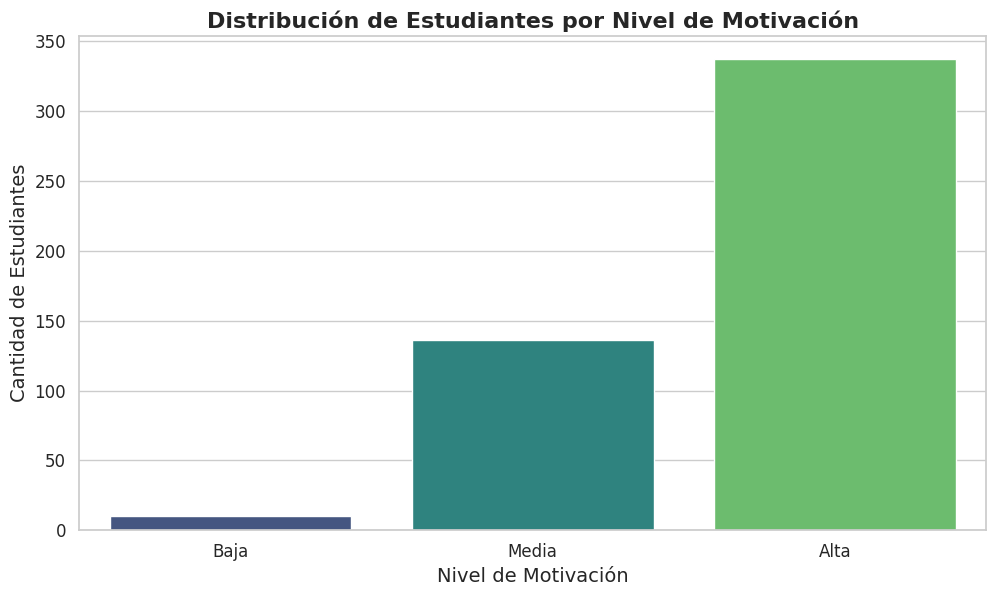

Cantidad de datos por nivel de motivación:
motivacion_clasificada
Baja      10
Media    136
Alta     337
Name: count, dtype: int64

Rangos de motivación:
Baja: 0-3
Media: 4-7
Alta: 8-10


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reclasificar la motivación en categorías 'Baja', 'Media' y 'Alta'
df['motivacion'] = df['motivacion'].astype(int)

bins_motivacion = [0, 3, 7, 10]
labels_motivacion = ['Baja', 'Media', 'Alta']

df['motivacion_clasificada'] = pd.cut(
    df['motivacion'],
    bins=bins_motivacion,
    labels=labels_motivacion,
    include_lowest=True,
    right=True
)

motivacion_categories = ['Baja', 'Media', 'Alta']

df['motivacion_clasificada'] = pd.Categorical(
    df['motivacion_clasificada'],
    categories=motivacion_categories,
    ordered=True
)

# Visualizar la distribución de la motivación reclasificada
motivacion_counts = df['motivacion_clasificada'].value_counts().reindex(motivacion_categories)

# Mostrar la distribución con un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=motivacion_counts.index, y=motivacion_counts.values, palette='viridis')
plt.xlabel('Nivel de Motivación', fontsize=14)
plt.ylabel('Cantidad de Estudiantes', fontsize=14)
plt.title('Distribución de Estudiantes por Nivel de Motivación', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Información adicional sobre la distribución
print("Cantidad de datos por nivel de motivación:")
print(motivacion_counts)
print("\nRangos de motivación:")
print(f"Baja: {bins_motivacion[0]}-{bins_motivacion[1]}")
print(f"Media: {bins_motivacion[1]+1}-{bins_motivacion[2]}")
print(f"Alta: {bins_motivacion[2]+1}-{bins_motivacion[3]}")


<ipython-input-48-0ef491a87dff>:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




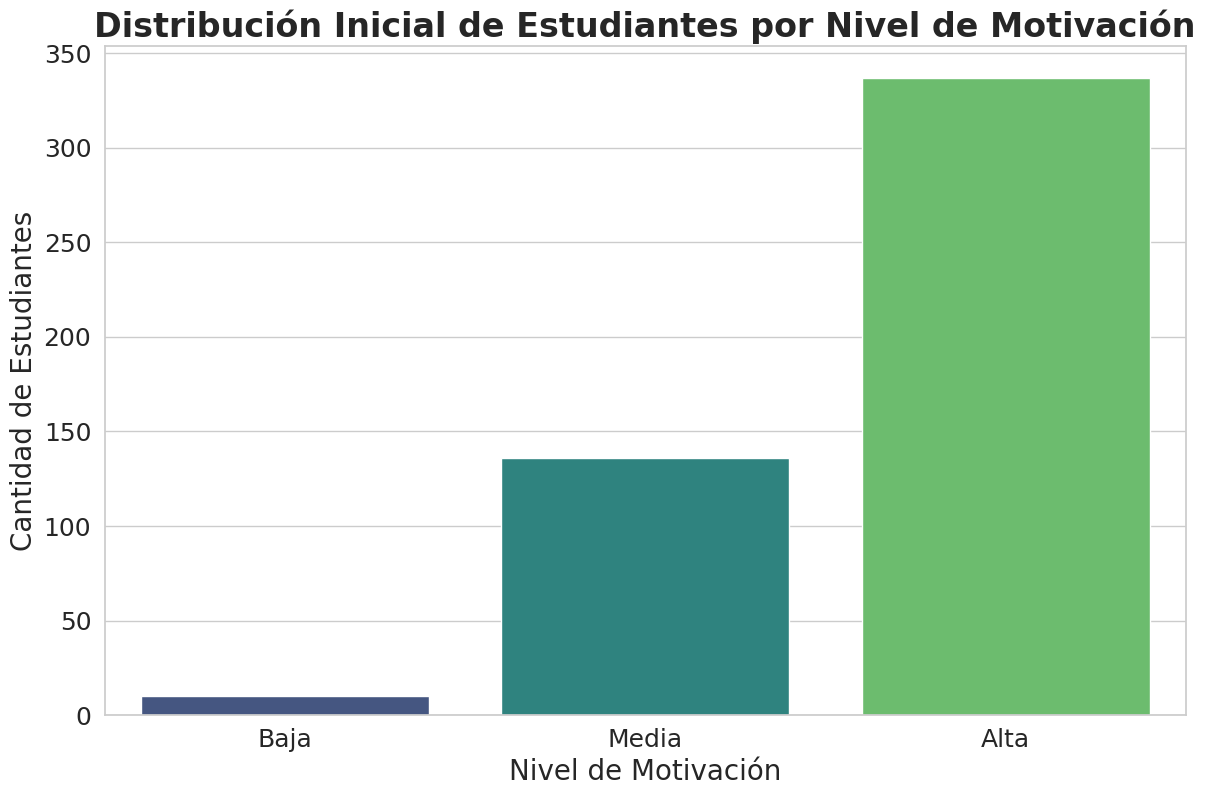

Cantidad de datos por nivel de motivación (original):
motivacion_clasificada
Baja      10
Media    136
Alta     337
Name: count, dtype: int64

Rangos de motivación:
Baja: 0-3
Media: 4-7
Alta: 8-10


<ipython-input-48-0ef491a87dff>:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




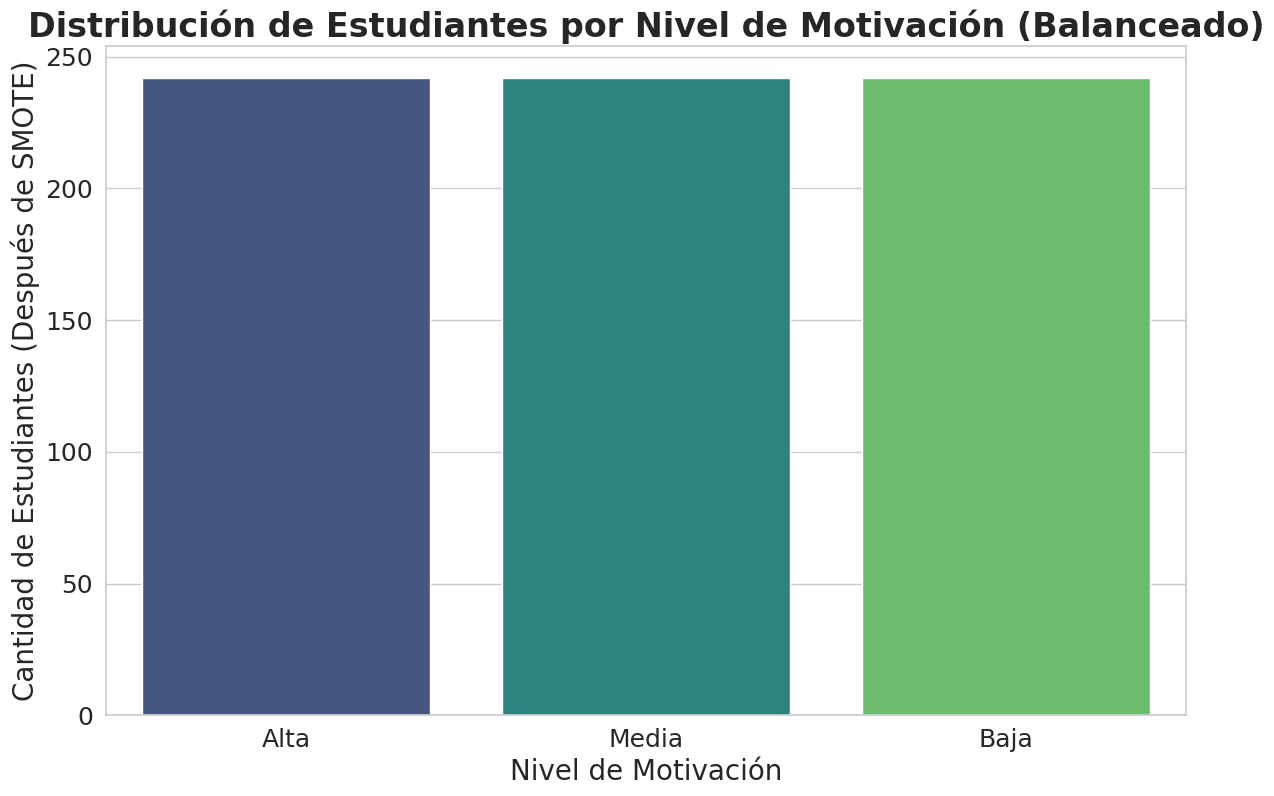


Cantidad de datos por nivel de motivación (balanceado con SMOTE):
Counter({'Alta': 242, 'Media': 242, 'Baja': 242})


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

df['motivacion'] = df['motivacion'].astype(int)

bins_motivacion = [0, 3, 7, 10]
labels_motivacion = ['Baja', 'Media', 'Alta']

df['motivacion_clasificada'] = pd.cut(
    df['motivacion'],
    bins=bins_motivacion,
    labels=labels_motivacion,
    include_lowest=True,
    right=True
)

motivacion_categories = ['Baja', 'Media', 'Alta']

df['motivacion_clasificada'] = pd.Categorical(
    df['motivacion_clasificada'],
    categories=motivacion_categories,
    ordered=True
)

motivacion_counts = df['motivacion_clasificada'].value_counts().reindex(motivacion_categories)
plt.figure(figsize=(12, 8))
sns.barplot(x=motivacion_counts.index, y=motivacion_counts.values, palette='viridis')
plt.xlabel('Nivel de Motivación', fontsize=20)
plt.ylabel('Cantidad de Estudiantes', fontsize=20)
plt.title('Distribución Inicial de Estudiantes por Nivel de Motivación', fontsize=24, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

print("Cantidad de datos por nivel de motivación (original):")
print(motivacion_counts)
print("\nRangos de motivación:")
print(f"Baja: {bins_motivacion[0]}-{bins_motivacion[1]}")
print(f"Media: {bins_motivacion[1]+1}-{bins_motivacion[2]}")
print(f"Alta: {bins_motivacion[2]+1}-{bins_motivacion[3]}")

df_features = df.drop(['motivacion_clasificada'], axis=1)
df_target = df['motivacion_clasificada']

df_features = pd.get_dummies(df_features)

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)

smote = SMOTE(sampling_strategy='not majority', random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

resampled_counts = Counter(y_resampled)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(resampled_counts.keys()), y=list(resampled_counts.values()), palette='viridis')
plt.xlabel('Nivel de Motivación', fontsize=20)
plt.ylabel('Cantidad de Estudiantes (Después de SMOTE)', fontsize=20)
plt.title('Distribución de Estudiantes por Nivel de Motivación (Balanceado)', fontsize=24, fontweight='bold')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

print("\nCantidad de datos por nivel de motivación (balanceado con SMOTE):")
print(resampled_counts)


In [ ]:
bins_edad = [15, 20, 25, 30, df['edad'].max()]
labels_edad = ['16-20', '21-25', '26-30', 'Más de 30']

df['grupo_edad'] = pd.cut(
    df['edad'],
    bins=bins_edad,
    labels=labels_edad,
    include_lowest=True,
    right=True
)

edad_categories = ['16-20', '21-25', '26-30', 'Más de 30']

df['grupo_edad'] = pd.Categorical(
    df['grupo_edad'],
    categories=edad_categories,
    ordered=True
)


In [ ]:
fig = px.histogram(
    df,
    x='grupo_edad',
    color='motivacion_clasificada',
    barmode='stack',
    category_orders={
        'grupo_edad': edad_categories,
        'motivacion_clasificada': motivacion_categories
    },
    title=''
)

fig.update_layout(
    xaxis_title='Grupo de Edad',
    yaxis_title='Número de Estudiantes',
    legend_title='Motivación'
)

fig.show()


In [ ]:
df['financiacion'] = df['financiacion'].astype(str)
financiacion_categories = sorted(df['financiacion'].unique())
df['financiacion'] = pd.Categorical(
    df['financiacion'],
    categories=financiacion_categories,
    ordered=False
)


In [ ]:
import pandas as pd
import plotly.express as px

df['carrera'] = df['carrera'].astype(str)
carrera_categories = sorted(df['carrera'].unique())
df['carrera'] = pd.Categorical(
    df['carrera'],
    categories=carrera_categories,
    ordered=False
)


In [ ]:
fig = px.histogram(
    df,
    x='carrera',
    color='motivacion_clasificada',
    barmode='stack',
    category_orders={
        'carrera': carrera_categories,
        'motivacion_clasificada': motivacion_categories
    },
    title=''
)

fig.update_layout(
    xaxis_title='Carrera',
    yaxis_title='Número de Estudiantes',
    legend_title='Motivación'
)

fig.show()


In [ ]:
df['transporte'] = df['transporte'].astype(str)
transporte_categories = sorted(df['transporte'].unique())
df['transporte'] = pd.Categorical(
    df['transporte'],
    categories=transporte_categories,
    ordered=False
)



In [ ]:
fig = px.histogram(
    df,
    x='transporte',
    color='motivacion_clasificada',
    barmode='group',
    category_orders={
        'transporte': transporte_categories,
        'motivacion_clasificada': motivacion_categories
    },
    title='Distribución de la Motivación Clasificada por Tipo de Transporte'
)

fig.update_layout(
    xaxis_title='Tipo de Transporte',
    yaxis_title='Número de Estudiantes',
    legend_title='Motivación'
)

fig.show()


In [ ]:
unique_values = set(df['per_profesores'].unique().tolist() +
                    df["p_profesores"].unique().tolist() +
                    df["c_profesores"].unique().tolist())

value_to_index = {value: idx for idx, value in enumerate(unique_values)}

df['per_profesores'] = df['per_profesores'].map(value_to_index)
df["p_profesores"] = df["p_profesores"].map(value_to_index)
df["c_profesores"] = df["c_profesores"].map(value_to_index)

In [ ]:
# Mapping qualifications
unique_values = set(df["p_profesores"].unique().tolist() +
                    df["c_profesores"].unique().tolist())

value_to_index = {value: idx for idx, value in enumerate(unique_values)}

df["p_profesores"] = df["p_profesores"].map(value_to_index)
df["c_profesores"] = df["c_profesores"].map(value_to_index)

In [ ]:
df = df.drop(['ID_s', 'ID2', 'sisben', 'campus'],
                              axis = 1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
df['motivacion_encoded'] = OrdinalEncoder(categories = [['1', '2', '3','4', '5', '6', '7', '8', '9', '10']]).fit_transform(df[['motivacion']])
# df.drop('motivacion', axis = 1, inplace = True)

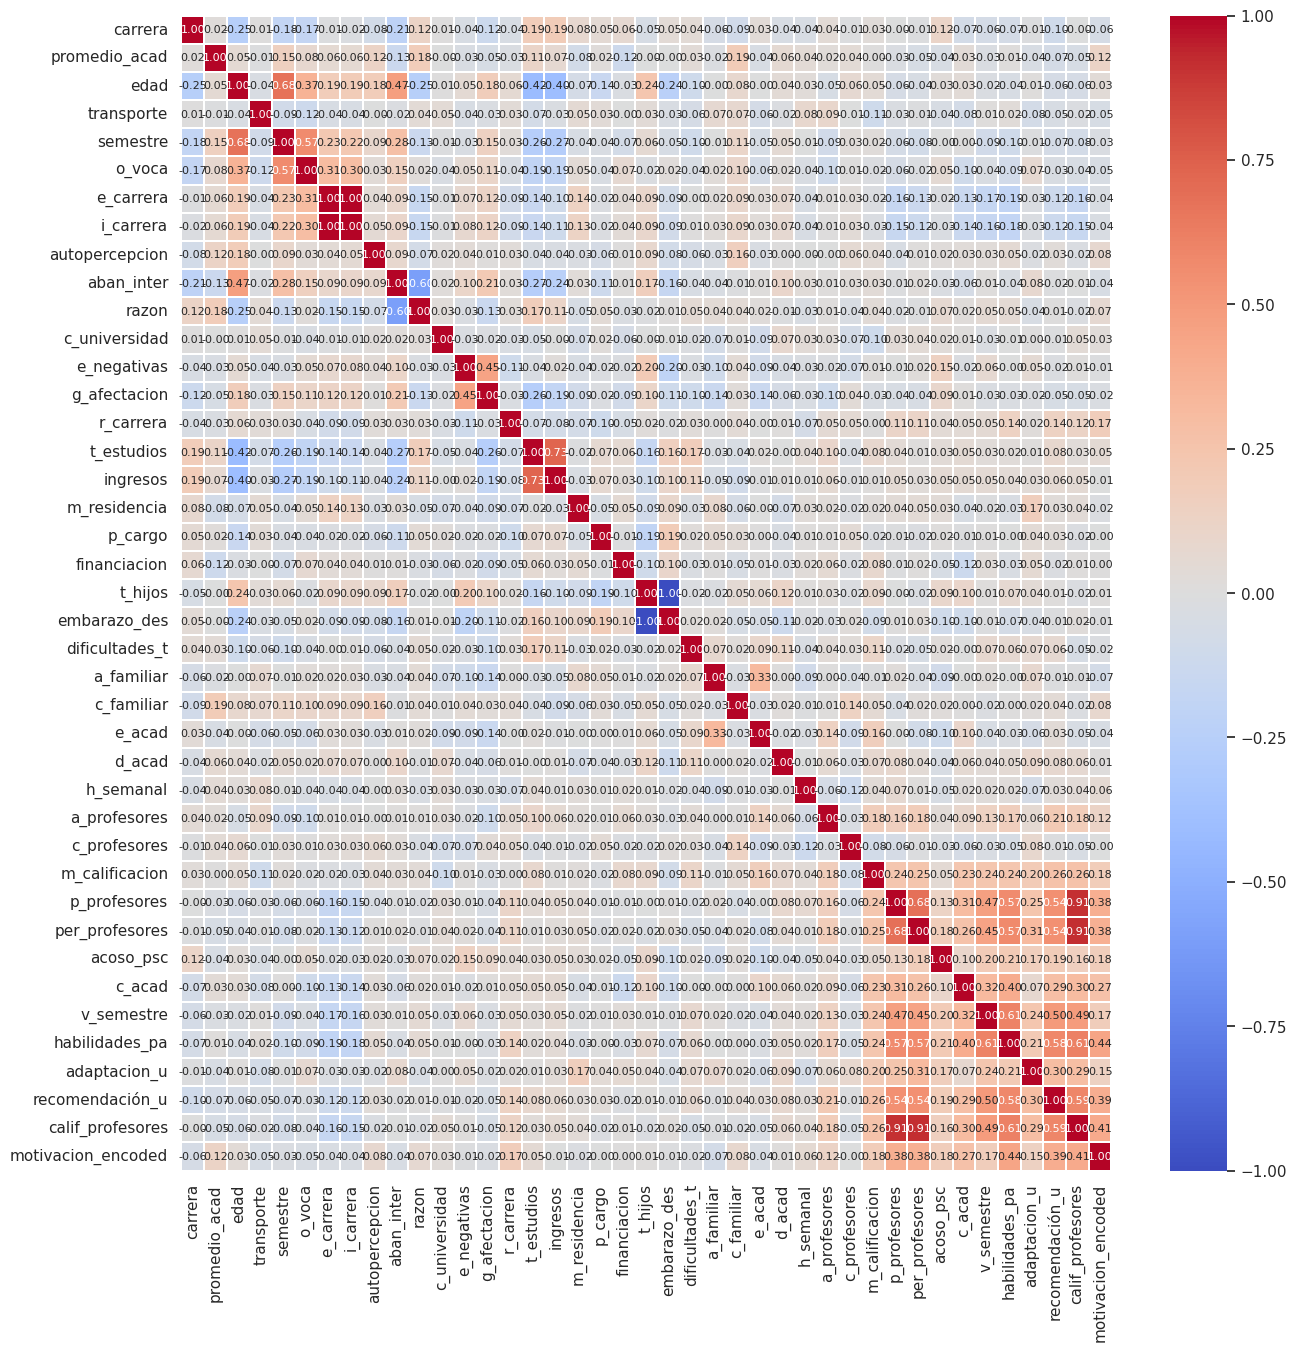

In [ ]:
plt.figure(figsize = (15, 15))
plt.rcParams.update({'font.size': 8})
sns.heatmap(df.drop('motivacion', axis = 1).corr(method = 'spearman'), vmin = -1, vmax = 1, center = 0,
            cmap = 'coolwarm', fmt = '.2f', linewidths = .2, annot = True);

In [ ]:
df['calif_profesores'] = df[['per_profesores', 'p_profesores']].mean(axis = 1)


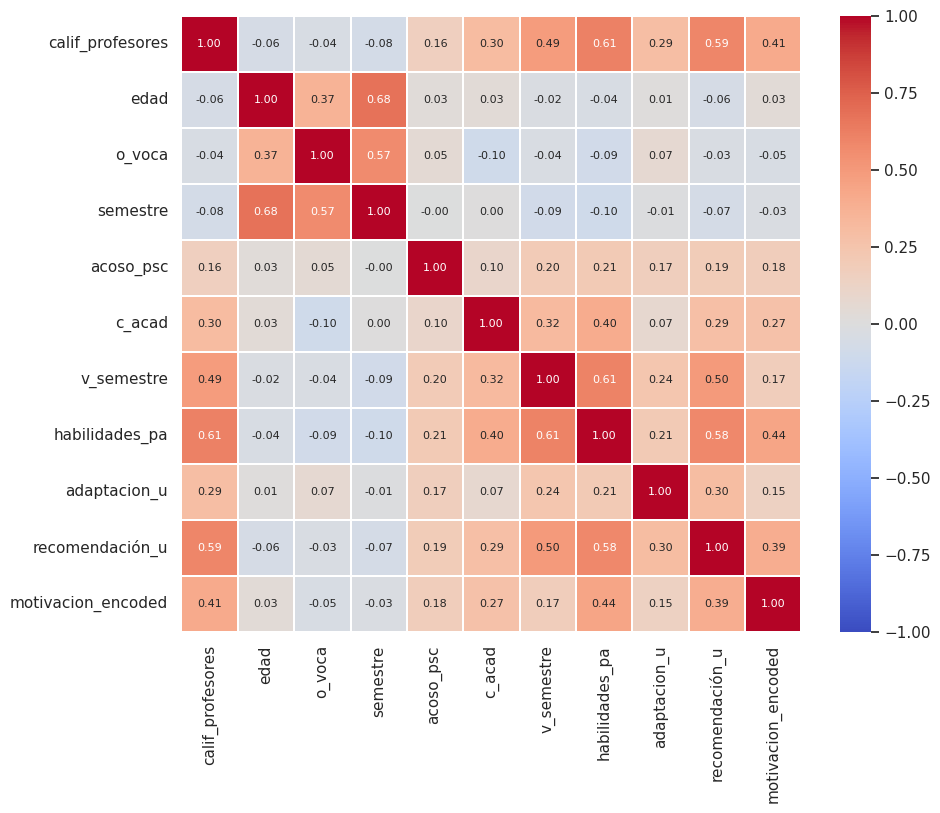

In [ ]:
num_features = df[['calif_profesores', 'edad', 'o_voca', 'semestre','acoso_psc', 'c_acad', 'v_semestre', 'habilidades_pa', 'adaptacion_u', 'recomendación_u', 'motivacion_encoded']]

plt.figure(figsize = (10, 8))
plt.rcParams.update({'font.size': 8})
sns.heatmap(num_features.corr(method = 'spearman'), vmin = -1, vmax = 1, center = 0,
            cmap = 'coolwarm', fmt = '.2f', linewidths = .2, annot = True);

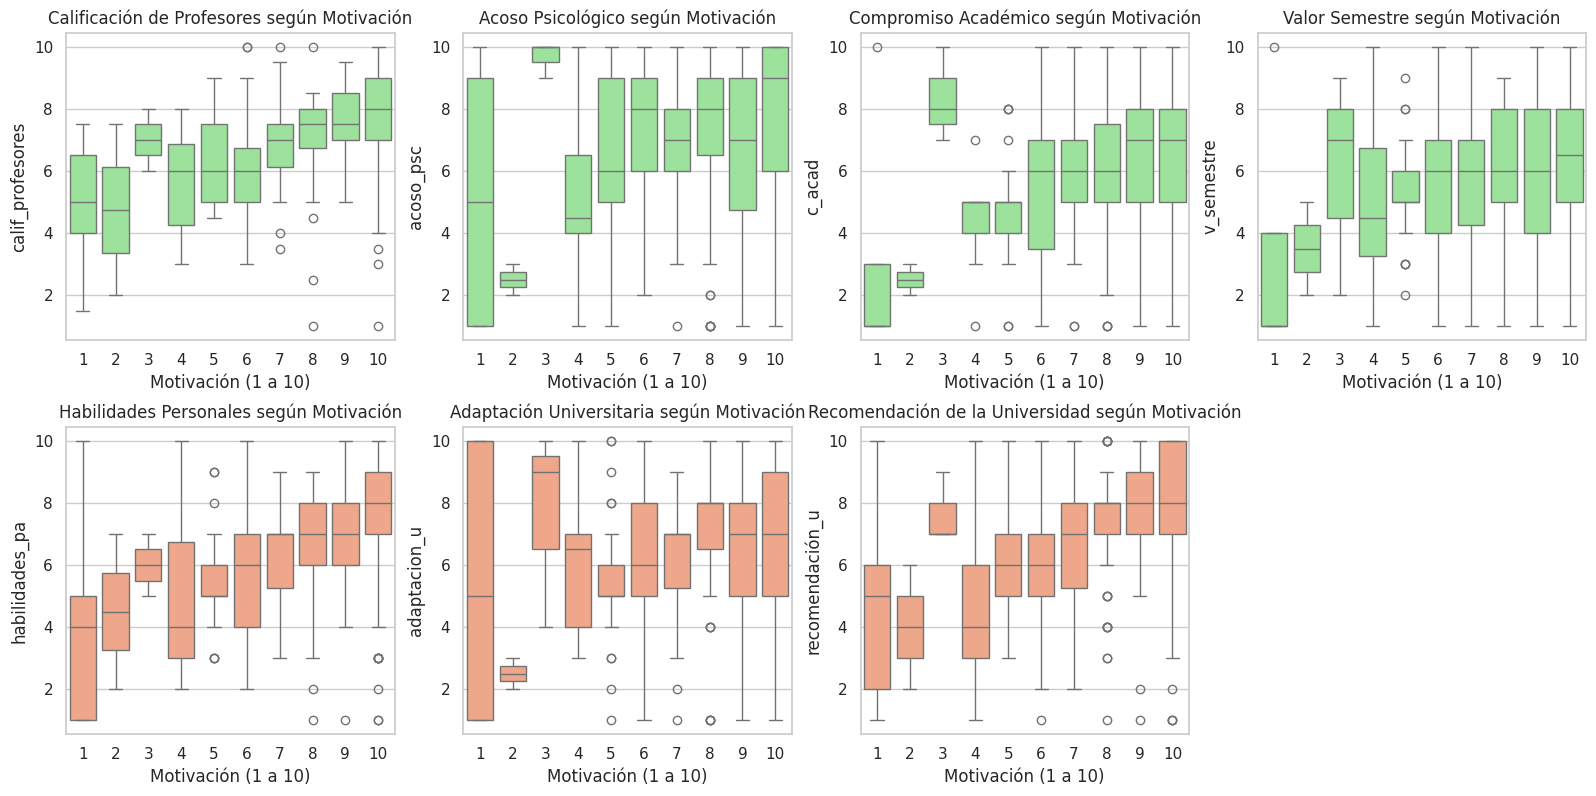

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axes_flat = axes.flatten()

ax1 = axes_flat[0]
ax2 = axes_flat[1]
ax3 = axes_flat[2]
ax4 = axes_flat[3]
ax5 = axes_flat[4]
ax6 = axes_flat[5]
ax7 = axes_flat[6]

fig.delaxes(axes_flat[7])

sns.boxplot(data=df, x='motivacion_encoded', y='calif_profesores',
            color='lightgreen', ax=ax1)
ax1.set_title('Calificación de Profesores según Motivación')
ax1.set_xlabel("Motivación (1 a 10)")
ax1.set_xticks(range(10))
ax1.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

sns.boxplot(data=df, x='motivacion_encoded', y='acoso_psc',
            color='lightgreen', ax=ax2)
ax2.set_title('Acoso Psicológico según Motivación')
ax2.set_xlabel("Motivación (1 a 10)")
ax2.set_xticks(range(10))
ax2.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

sns.boxplot(data=df, x='motivacion_encoded', y='c_acad',
            color='lightgreen', ax=ax3)
ax3.set_title('Compromiso Académico según Motivación')
ax3.set_xlabel("Motivación (1 a 10)")
ax3.set_xticks(range(10))
ax3.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

sns.boxplot(data=df, x='motivacion_encoded', y='v_semestre',
            color='lightgreen', ax=ax4)
ax4.set_title('Valor Semestre según Motivación')
ax4.set_xlabel("Motivación (1 a 10)")
ax4.set_xticks(range(10))
ax4.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

sns.boxplot(data=df, x='motivacion_encoded', y='habilidades_pa',
            color='lightsalmon', ax=ax5)
ax5.set_title('Habilidades Personales según Motivación')
ax5.set_xlabel("Motivación (1 a 10)")
ax5.set_xticks(range(10))
ax5.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

sns.boxplot(data=df, x='motivacion_encoded', y='adaptacion_u',
            color='lightsalmon', ax=ax6)
ax6.set_title('Adaptación Universitaria según Motivación')
ax6.set_xlabel("Motivación (1 a 10)")
ax6.set_xticks(range(10))
ax6.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

sns.boxplot(data=df, x='motivacion_encoded', y='recomendación_u',
            color='lightsalmon', ax=ax7)
ax7.set_title('Recomendación de la Universidad según Motivación')
ax7.set_xlabel("Motivación (1 a 10)")
ax7.set_xticks(range(10))
ax7.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

plt.tight_layout()

plt.show()


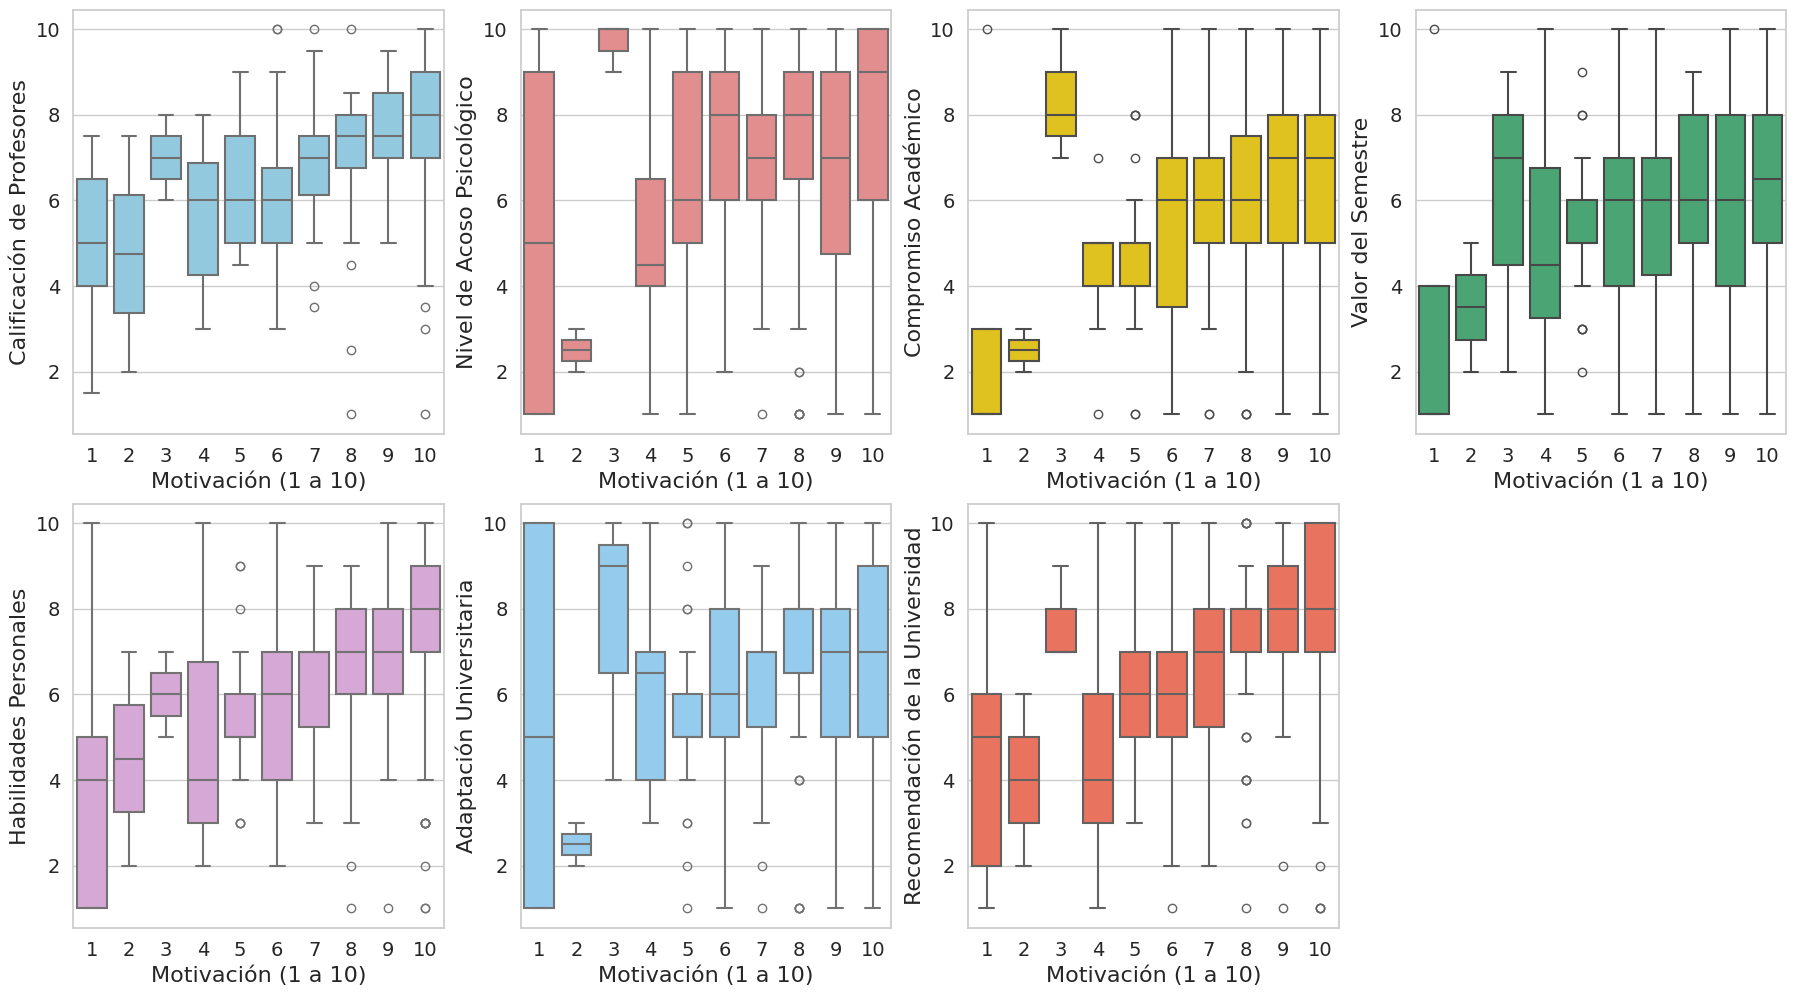

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

axes_flat = axes.flatten()

ax1 = axes_flat[0]
ax2 = axes_flat[1]
ax3 = axes_flat[2]
ax4 = axes_flat[3]
ax5 = axes_flat[4]
ax6 = axes_flat[5]
ax7 = axes_flat[6]

fig.delaxes(axes_flat[7])

sns.boxplot(data=df, x='motivacion_encoded', y='calif_profesores',
            color='skyblue', ax=ax1, linewidth=1.5)
ax1.set_xlabel("Motivación (1 a 10)", fontsize=16)
ax1.set_ylabel("Calificación de Profesores", fontsize=16)
ax1.set_xticks(range(10))
ax1.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=14)
ax1.tick_params(axis='y', labelsize=14)

sns.boxplot(data=df, x='motivacion_encoded', y='acoso_psc',
            color='lightcoral', ax=ax2, linewidth=1.5)
ax2.set_xlabel("Motivación (1 a 10)", fontsize=16)
ax2.set_ylabel("Nivel de Acoso Psicológico", fontsize=16)
ax2.set_xticks(range(10))
ax2.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=14)
ax2.tick_params(axis='y', labelsize=14)

sns.boxplot(data=df, x='motivacion_encoded', y='c_acad',
            color='gold', ax=ax3, linewidth=1.5)
ax3.set_xlabel("Motivación (1 a 10)", fontsize=16)
ax3.set_ylabel("Compromiso Académico", fontsize=16)
ax3.set_xticks(range(10))
ax3.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=14)
ax3.tick_params(axis='y', labelsize=14)

sns.boxplot(data=df, x='motivacion_encoded', y='v_semestre',
            color='mediumseagreen', ax=ax4, linewidth=1.5)
ax4.set_xlabel("Motivación (1 a 10)", fontsize=16)
ax4.set_ylabel("Valor del Semestre", fontsize=16)
ax4.set_xticks(range(10))
ax4.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=14)
ax4.tick_params(axis='y', labelsize=14)

sns.boxplot(data=df, x='motivacion_encoded', y='habilidades_pa',
            color='plum', ax=ax5, linewidth=1.5)
ax5.set_xlabel("Motivación (1 a 10)", fontsize=16)
ax5.set_ylabel("Habilidades Personales", fontsize=16)
ax5.set_xticks(range(10))
ax5.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=14)
ax5.tick_params(axis='y', labelsize=14)

sns.boxplot(data=df, x='motivacion_encoded', y='adaptacion_u',
            color='lightskyblue', ax=ax6, linewidth=1.5)
ax6.set_xlabel("Motivación (1 a 10)", fontsize=16)
ax6.set_ylabel("Adaptación Universitaria", fontsize=16)
ax6.set_xticks(range(10))
ax6.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=14)
ax6.tick_params(axis='y', labelsize=14)

sns.boxplot(data=df, x='motivacion_encoded', y='recomendación_u',
            color='tomato', ax=ax7, linewidth=1.5)
ax7.set_xlabel("Motivación (1 a 10)", fontsize=16)
ax7.set_ylabel("Recomendación de la Universidad", fontsize=16)
ax7.set_xticks(range(10))
ax7.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=14)
ax7.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

Conclusions = []
Conclusions.append(['Model Name', 'Train', 'Validation', 'Test'])

def Evaluate(model_name, y_train_pred, y_val_pred, y_test_pred):
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Accuracy Scores
    print(f"========== {model_name} ==========")
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")

    # Classification Reports
    print("=================================================================================================")
    print("Informe de clasificación del conjunto de entrenamiento:\n", classification_report(y_train, y_train_pred, zero_division=0))
    print("=================================================================================================")
    print("Informe de clasificación del conjunto de validación:\n", classification_report(y_val, y_val_pred, zero_division=0))
    print("=================================================================================================")
    print("Informe de clasificación del conjunto de prueba:\n", classification_report(y_test, y_test_pred, zero_division=0))

    return [model_name, accuracy_train, accuracy_val, accuracy_test]

# Preparar los datos
X = df.drop('motivacion', axis=1)
y = df['motivacion_encoded']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=categorical_cols)

# Dividir los datos
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Asegurarse de que las clases están representadas en cada conjunto
print("Clases en y_train:", y_train.unique())
print("Clases en y_val:", y_val.unique())
print("Clases en y_test:", y_test.unique())

Clases en y_train: [9. 4. 7. 5. 8. 1. 3. 6. 0. 2.]
Clases en y_val: [3. 9. 2. 4. 7. 8. 5. 6. 0.]
Clases en y_test: [7. 9. 8. 4. 0. 6. 5. 2.]


In [ ]:
#Evauar SVM
svm_model = SVC(random_state=42)
param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
print("Mejores hiperparámetros para SVM:")
print(grid_search_svm.best_params_)

best_svm_model = grid_search_svm.best_estimator_
y_train_pred_svm = best_svm_model.predict(X_train)
y_val_pred_svm = best_svm_model.predict(X_val)
y_test_pred_svm = best_svm_model.predict(X_test)
result_svm = Evaluate('SVM', y_train_pred_svm, y_val_pred_svm, y_test_pred_svm)
Conclusions.append(result_svm)

Mejores hiperparámetros para SVM:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
========== SVM ==========
Train Accuracy: 1.0
Validation Accuracy: 0.9027777777777778
Test Accuracy: 0.8767123287671232
Informe de clasificación del conjunto de entrenamiento:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         9
         4.0       1.00      1.00      1.00        20
         5.0       1.00      1.00      1.00        28
         6.0       1.00      1.00      1.00        34
         7.0       1.00      1.00      1.00        61
         8.0       1.00      1.00      1.00        47
         9.0       1.00      1.00      1.00       134

    accuracy                           1.00       338
   macro avg       1.00      1.00      1.00       338
weighted avg       1.00      1.00     

In [ ]:
# Definir el modelo KNN
knn_model = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    cv=5,             # Validación cruzada de 5 pliegues
    n_jobs=-1,        # Usar todos los núcleos disponibles
    scoring='accuracy'
)

grid_search_knn.fit(X_train, y_train)
print("Mejores hiperparámetros para KNN:")
print(grid_search_knn.best_params_)

best_knn_model = grid_search_knn.best_estimator_

# Predicciones
y_train_pred_knn = best_knn_model.predict(X_train)
y_val_pred_knn = best_knn_model.predict(X_val)
y_test_pred_knn = best_knn_model.predict(X_test)

# Evaluar y guardar los resultados
result_knn = Evaluate('KNN', y_train_pred_knn, y_val_pred_knn, y_test_pred_knn)
Conclusions.append(result_knn)


Mejores hiperparámetros para KNN:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
========== KNN ==========
Train Accuracy: 1.0
Validation Accuracy: 0.5
Test Accuracy: 0.410958904109589
Informe de clasificación del conjunto de entrenamiento:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         9
         4.0       1.00      1.00      1.00        20
         5.0       1.00      1.00      1.00        28
         6.0       1.00      1.00      1.00        34
         7.0       1.00      1.00      1.00        61
         8.0       1.00      1.00      1.00        47
         9.0       1.00      1.00      1.00       134

    accuracy                           1.00       338
   macro avg       1.00      1.00      1.00       338
weighted avg       1.00      1.00   

In [ ]:
results_df = pd.DataFrame(Conclusions[1:], columns=Conclusions[0])
print(results_df)

  Model Name  Train  Validation      Test
0        SVM    1.0    0.902778  0.876712
1        KNN    1.0    0.500000  0.410959
2        KNN    1.0    0.500000  0.410959


PRUEBAS DEL MODELO


In [ ]:
Conclusions = []
Conclusions.append(['Model Name', 'Train','Validion' , 'Test'])

def Evaluate(model_name, y_train_pred, y_val_pred, y_test_pred):
  accuracy_train = accuracy_score(y_train, y_train_pred)
  accuracy_val = accuracy_score(y_val, y_val_pred)
  accuracy_test = accuracy_score(y_test, y_test_pred)

  # Accuracy Scores
  print(f"Train Accuracy: {accuracy_train}")
  print(f"Validation Accuracy: {accuracy_val}")
  print(f"Test Accuracy: {accuracy_test}")

  # Classification Reports
  print("=================================================================================================")
  print("Informe de clasificación del juego de Train Set:\n", classification_report(y_train, y_train_pred, zero_division=0))
  print("=================================================================================================")
  print("Informe de clasificación para la validación :\n", classification_report(y_val, y_val_pred, zero_division=0))
  print("=================================================================================================")
  print("Informe de clasificación del conjunto de pruebas:\n", classification_report(y_test, y_test_pred, zero_division=0))

  return [model_name, accuracy_train, accuracy_val, accuracy_test]

In [ ]:
X = df.drop('motivacion', axis=1)
y = df['motivacion_encoded']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(y_train.unique())
print(y_val.unique())
print(y_test.unique())

[9. 4. 7. 5. 8. 1. 3. 6. 0. 2.]
[3. 9. 2. 4. 7. 8. 5. 6. 0.]
[7. 9. 8. 4. 0. 6. 5. 2.]


In [ ]:
log_reg_model = LogisticRegression(max_iter=10000)
log_reg_model.fit(X_train, y_train)

y_train_pred = log_reg_model.predict(X_train)
y_val_pred = log_reg_model.predict(X_val)
y_test_pred = log_reg_model.predict(X_test)

Conclusions.append(Evaluate('Logistic Regression', y_train_pred, y_val_pred, y_test_pred))

Train Accuracy: 0.9615384615384616
Validation Accuracy: 0.625
Test Accuracy: 0.6027397260273972
Informe de clasificación del juego de Train Set:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         9
         4.0       1.00      1.00      1.00        20
         5.0       0.93      0.89      0.91        28
         6.0       0.88      0.85      0.87        34
         7.0       0.93      0.93      0.93        61
         8.0       0.94      0.98      0.96        47
         9.0       1.00      1.00      1.00       134

    accuracy                           0.96       338
   macro avg       0.97      0.97      0.97       338
weighted avg       0.96      0.96      0.96       338

Informe de clasificación para la validación :
               precision    recall  f1-score   su

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)
y_val_pred = knn_model.predict(X_val)
y_test_pred = knn_model.predict(X_test)

Conclusions.append( Evaluate('KNN', y_train_pred, y_val_pred, y_test_pred) )

Train Accuracy: 0.5
Validation Accuracy: 0.3888888888888889
Test Accuracy: 0.3424657534246575
Informe de clasificación del juego de Train Set:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         1
         3.0       0.33      0.11      0.17         9
         4.0       0.35      0.30      0.32        20
         5.0       0.53      0.32      0.40        28
         6.0       0.33      0.29      0.31        34
         7.0       0.38      0.56      0.45        61
         8.0       0.38      0.34      0.36        47
         9.0       0.66      0.69      0.68       134

    accuracy                           0.50       338
   macro avg       0.30      0.26      0.27       338
weighted avg       0.49      0.50      0.49       338

Informe de clasificación para la validación :
               precision    recall  f1-score   supp

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train.values.ravel())

y_train_pred = svm_classifier.predict(X_train)
y_val_pred = svm_classifier.predict(X_val)
y_test_pred = svm_classifier.predict(X_test)

Conclusions.append( Evaluate('SVM', y_train_pred, y_val_pred, y_test_pred) )

Train Accuracy: 1.0
Validation Accuracy: 0.9027777777777778
Test Accuracy: 0.8767123287671232
Informe de clasificación del juego de Train Set:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         9
         4.0       1.00      1.00      1.00        20
         5.0       1.00      1.00      1.00        28
         6.0       1.00      1.00      1.00        34
         7.0       1.00      1.00      1.00        61
         8.0       1.00      1.00      1.00        47
         9.0       1.00      1.00      1.00       134

    accuracy                           1.00       338
   macro avg       1.00      1.00      1.00       338
weighted avg       1.00      1.00      1.00       338

Informe de clasificación para la validación :
               precision    recall  f1-score   supp